1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?


1. Common hyperparameters of decision tree models include:
   - Max Depth: Determines the maximum depth of the tree. Higher values can lead to more complex models,
    which may result in overfitting if not properly tuned.
   - Min Samples Split: Specifies the minimum number of samples required to split an internal node. Increasing
    this value can prevent the tree from splitting too early, potentially reducing overfitting.
   - Min Samples Leaf: Sets the minimum number of samples required to be at a leaf node. Larger values can lead
    to simpler trees by preventing nodes with very few samples.
   - Max Features: Controls the number of features considered when looking for the best split. It can help in
    reducing model complexity and training time.
   - Criterion: Determines the function used to measure the quality of a split. Common criteria include "gini"
    for Gini impurity and "entropy" for information gain.
    

   These hyperparameters affect the model's performance by controlling its complexity and ability to generalize 
to unseen data. For example, increasing the max depth or allowing smaller splits with min samples split may lead
to a more complex model that can capture intricate patterns in the training data but may

2. The main difference between Label encoding and One-hot encoding lies in how categorical variables are represented:

   - Label Encoding: Involves assigning each category in a categorical variable a unique numerical label. This encoding 
    method is suitable for ordinal categorical variables, where there is a natural ordering among the categories. However,
    it may introduce ordinality where there is none, potentially leading to incorrect model interpretations.

   - One-hot Encoding: Converts categorical variables into binary vectors, where each category is represented by a binary
    indicator variable. Each category corresponds to a binary feature, where a value of 1 indicates the presence of the 
    category, and 0 indicates absence. This method is suitable for nominal categorical variables, where there is no
    inherent order among the categories. One-hot encoding avoids the issue of introducing ordinality and allows models
    to interpret each category as equally distant from each other.

   In summary, Label encoding preserves ordinal information but may introduce unintended ordinality, while One-hot 
encoding treats each category as independent and is suitable for nominal variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Company Data

### Scenario

In [3]:
df = pd.read_csv('Company_Data.csv')
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [4]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [7]:
df.shape

(400, 11)

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

    There are no duplicate rows

In [9]:
df.T.duplicated()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [10]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

    There are no null values.

In [11]:
df1 = df.describe()
df1

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
316  15.63        122      36            5         369     72      Good   35   
376  16.27        141      60           19         319     92      Good   44   

     Education Urban   US  
316         10   Yes  Yes  
376         11   Yes  Yes  
-0.504999999999999
15.215


<Axes: >

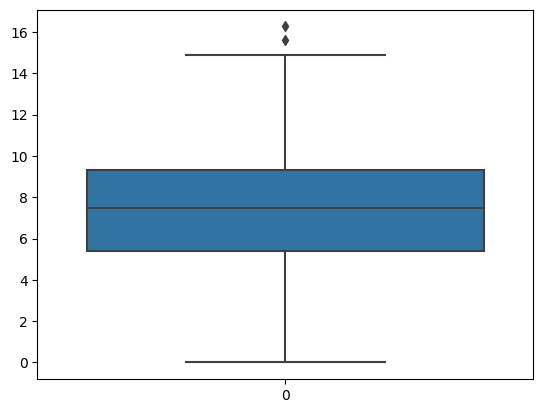

In [12]:
# For Sales

q1 = df1.iloc[4,0]
q3 = df1.iloc[6,0]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['Sales']<lower_limit) | (df['Sales']>upper_limit)])

print(lower_limit)
print(upper_limit)


sns.boxplot(df['Sales'])

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
42   10.43         77      69            0          25     24    Medium   50   
310   9.53        175      65           29         419    166    Medium   53   

     Education Urban   US  
42          18   Yes   No  
310         12   Yes  Yes  
85.0
165.0


<Axes: >

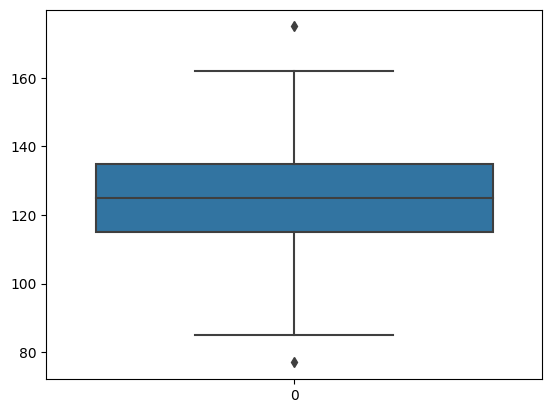

In [13]:
# For CompPrice

q1 = df1.iloc[4,1]
q3 = df1.iloc[6,1]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['CompPrice']<lower_limit) | (df['CompPrice']>upper_limit)])

print(lower_limit)
print(upper_limit)


sns.boxplot(df['CompPrice'])

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []
-29.625
163.375


<Axes: >

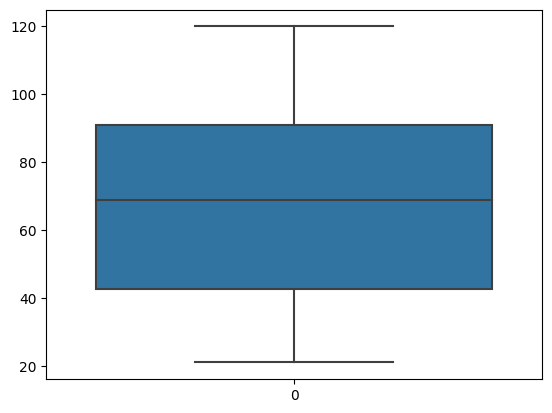

In [14]:
# For Income

q1 = df1.iloc[4,2]
q3 = df1.iloc[6,2]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['Income']<lower_limit) | (df['Income']>upper_limit)])

print(lower_limit)
print(upper_limit)


sns.boxplot(df['Income'])

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []
-18.0
30.0


<Axes: >

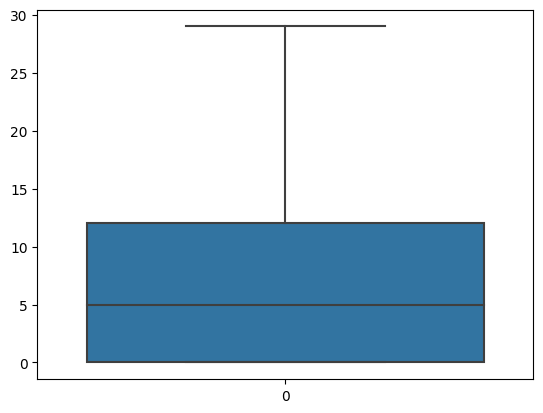

In [15]:
# For Advertising

q1 = df1.iloc[4,3]
q3 = df1.iloc[6,3]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['Advertising']<lower_limit) | (df['Advertising']>upper_limit)])

print(lower_limit)
print(upper_limit)


sns.boxplot(df['Advertising'])

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []
-250.25
787.75


<Axes: >

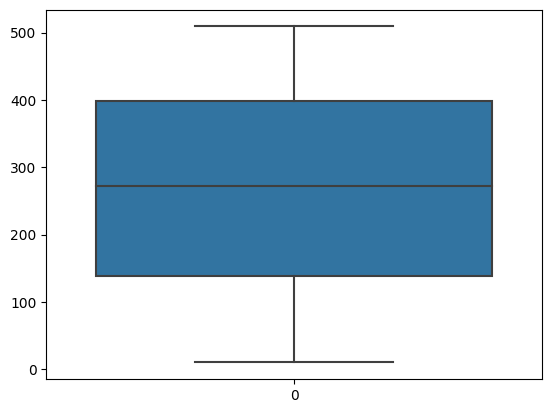

In [16]:
# For Population

q1 = df1.iloc[4,4]
q3 = df1.iloc[6,4]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['Population']<lower_limit) | (df['Population']>upper_limit)])

print(lower_limit)
print(upper_limit)


sns.boxplot(df['Population'])

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
42   10.43         77      69            0          25     24    Medium   50   
125   9.34         89      78            0         181     49    Medium   43   
165   0.37        147      58            7         100    191       Bad   27   
174   0.00        139      24            0         358    185    Medium   79   
367  14.37         95     106            0         256     53      Good   52   

     Education Urban   US  
42          18   Yes   No  
125         15    No   No  
165         15   Yes  Yes  
174         15    No   No  
367         17   Yes   No  
53.5
177.5


<Axes: >

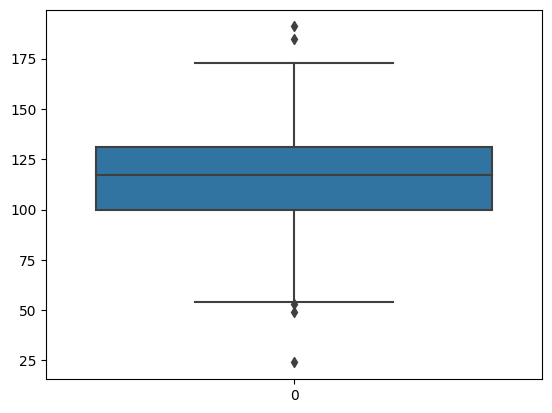

In [17]:
# For Price

q1 = df1.iloc[4,5]
q3 = df1.iloc[6,5]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['Price']<lower_limit) | (df['Price']>upper_limit)])

print(lower_limit)
print(upper_limit)


sns.boxplot(df['Price'])

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []
0.375
105.375


<Axes: >

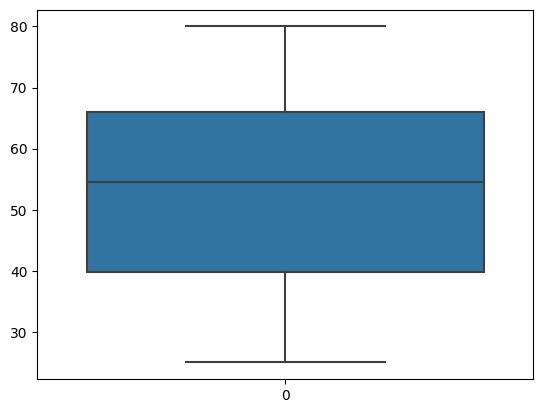

In [18]:
# For Age

q1 = df1.iloc[4,6]
q3 = df1.iloc[6,6]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['Age']<lower_limit) | (df['Age']>upper_limit)])

print(lower_limit)
print(upper_limit)


sns.boxplot(df['Age'])

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []
6.0
22.0


<Axes: >

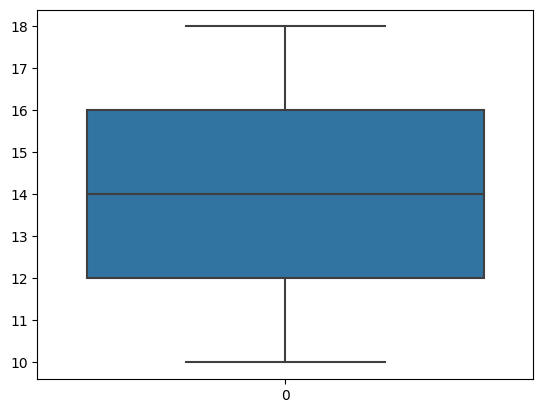

In [19]:
# For Education

q1 = df1.iloc[4,7]
q3 = df1.iloc[6,7]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['Education']<lower_limit) | (df['Education']>upper_limit)])

print(lower_limit)
print(upper_limit)


sns.boxplot(df['Education'])

In [20]:
corr = df.corr()
corr

<ipython-input-20-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

<ipython-input-21-2c7478f2bb47>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


<Axes: >

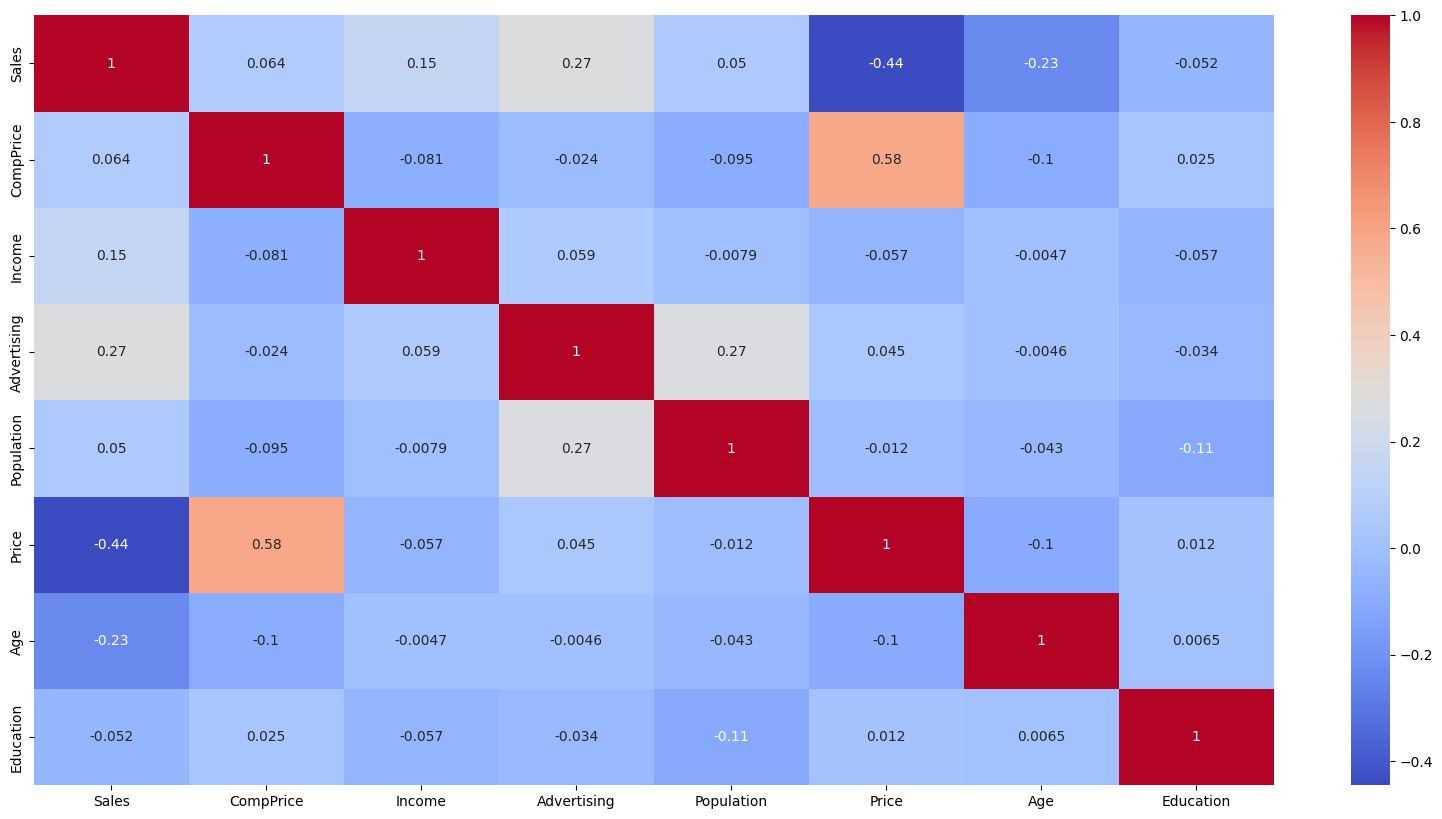

In [21]:
corr_mat = df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')

<Figure size 2000x2000 with 0 Axes>

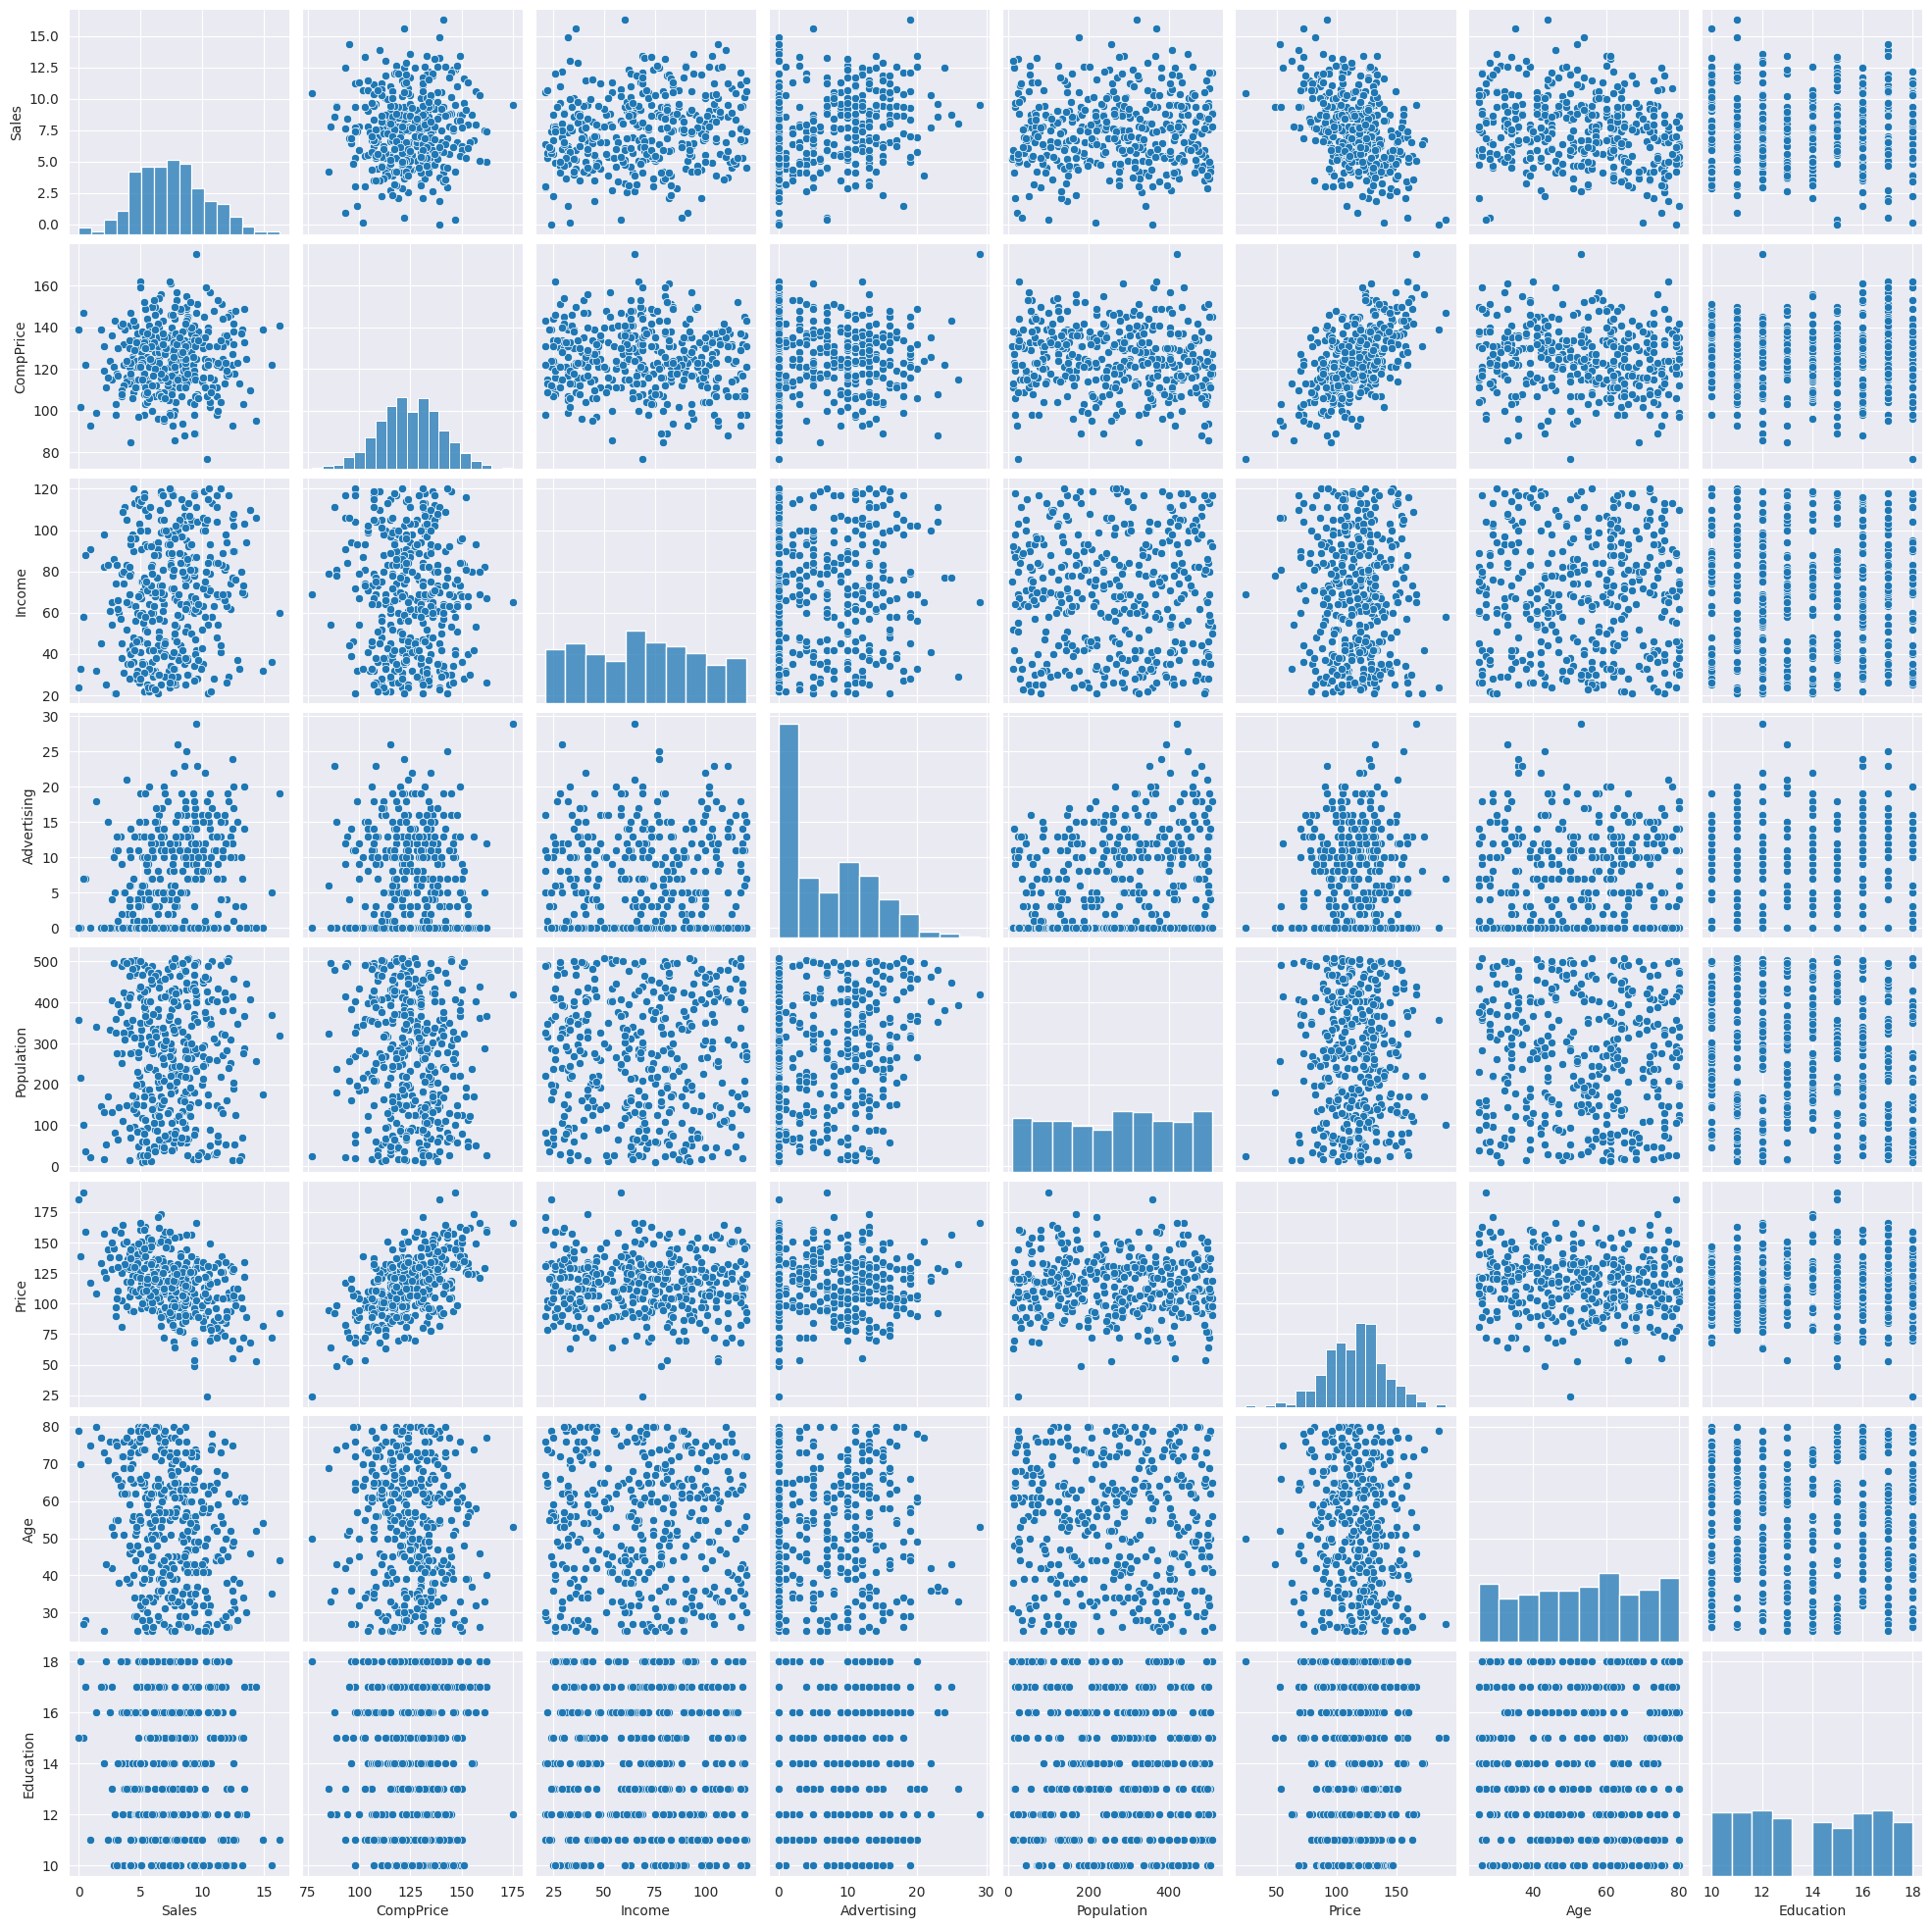

In [22]:
plt.figure(figsize=(20,20))
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [23]:
# Checking quantiles and median values to take decision about the categories
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [24]:
# Defining the bins and labels for the categories
bins = [-float('inf'), 5, 7.5, 10, float('inf')]
labels = ['Very Low', 'Low', 'Moderate', 'High']

# Adding a new categorical column based on sales categories
df['Sales_'] = pd.cut(df['Sales'], bins=bins, labels=labels)

# Display the resulting DataFrame
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US    Sales_  
0           17   Yes  Yes  Moderate  
1           10   Yes  Yes      High  
2           12   Yes  Yes      High  
3           14   Yes  Yes       Low  
4           13   Yes   No  Very Low  
..         ...   ...  ...       ...  
395         14   Yes  Yes      High  
396         11    No  Yes       Low  
397         18   Yes  Yes       Low  
398         12   Yes  Yes       Low  
399         16   Yes  Yes  Moderate  

[400 rows x 12 columns]

In [25]:
df1 = df.copy()
df1

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US    Sales_  
0           17   Yes  Yes  Moderate  
1           10   Yes  Yes      High  
2           12   Yes  Yes      High  
3           14   Yes  Yes       Low  
4           13   Yes   No  Very Low  
..         ...   ...  ...       ...  
395         14   Yes  Yes      High  
396         11    No  Yes       Low  
397         18   Yes  Yes       Low  
398         12   Yes  Yes       Low  
399         16   Yes  Yes  Moderate  

[400 rows x 12 columns]

In [26]:
print(df1['Sales_'].unique())
print(df1['ShelveLoc'].unique())
print(df1['Urban'].unique())
print(df1['US'].unique())

['Moderate', 'High', 'Low', 'Very Low']
Categories (4, object): ['Very Low' < 'Low' < 'Moderate' < 'High']
['Bad' 'Good' 'Medium']
['Yes' 'No']
['Yes' 'No']


In [27]:
col_to_encode = ['ShelveLoc','Urban','US','Sales_']

df1[col_to_encode].dtypes

ShelveLoc      object
Urban          object
US             object
Sales_       category
dtype: object

In [28]:
df1

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US    Sales_  
0           17   Yes  Yes  Moderate  
1           10   Yes  Yes      High  
2           12   Yes  Yes      High  
3           14   Yes  Yes       Low  
4           13   Yes   No  Very Low  
..         ...   ...  ...       ...  
395         14   Yes  Yes      High  
396         11    No  Yes       Low  
397         18   Yes  Yes       Low  
398         12   Yes  Yes       Low  
399         16   Yes  Yes  Moderate  

[400 rows x 12 columns]

In [29]:
label_for_sales = {'Very Low':0,'Low':1,'Moderate':2,'High':3}
label_for_shelve = {'Bad':0,'Medium':1,'Good':2}

df1['ShelveLoc'] = df1['ShelveLoc'].map(label_for_shelve)
df1['Sales_'] = df1['Sales_'].map(label_for_sales)
df1

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          2   65   
2    10.06        113      35           10         269     80          1   59   
3     7.40        117     100            4         466     97          1   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          2   33   
396   6.14        139      23            3          37    120          1   55   
397   7.41        162      26           12         368    159          1   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          2   49   

     Education Urban   US Sales_  
0           17   Yes  Yes      2  
1           10   Yes  Yes      3  
2           12   Yes  Yes      3  
3           14   Yes  Yes      1  
4           13   Yes   No      0  
..         ...   ...  ...    ...  
395         14   Yes  Yes      3  
396         11    No  Yes      1  
397         18   Yes  Yes      1  
398         12   Yes  Yes      1  
399         16   Yes  Yes      2  

[400 rows x 12 columns]

In [30]:
col_to_encode = ['Urban','US']
lb = LabelEncoder()
for col in col_to_encode:
  df1[col] = lb.fit_transform(df1[col])
df1

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          2   65   
2    10.06        113      35           10         269     80          1   59   
3     7.40        117     100            4         466     97          1   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          2   33   
396   6.14        139      23            3          37    120          1   55   
397   7.41        162      26           12         368    159          1   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          2   49   

     Education  Urban  US Sales_  
0           17      1   1      2  
1           10      1   1      3  
2           12      1   1      3  
3           14      1   1      1  
4           13      1   0      0  
..         ...    ...  ..    ...  
395         14      1   1      3  
396         11      0   1      1  
397         18      1   1      1  
398         12      1   1      1  
399         16      1   1      2  

[400 rows x 12 columns]

In [31]:
df1.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc         int64
Age               int64
Education         int64
Urban             int64
US                int64
Sales_         category
dtype: object

In [32]:
df1.drop('Sales',inplace=True,axis=1)
df1

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          2   65   
2          113      35           10         269     80          1   59   
3          117     100            4         466     97          1   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          2   33   
396        139      23            3          37    120          1   55   
397        162      26           12         368    159          1   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          2   49   

     Education  Urban  US Sales_  
0           17      1   1      2  
1           10      1   1      3  
2           12      1   1      3  
3           14      1   1      1  
4           13      1   0      0  
..         ...    ...  ..    ...  
395         14      1   1      3  
396         11      0   1      1  
397         18      1   1      1  
398         12      1   1      1  
399         16      1   1      2  

[400 rows x 11 columns]

### Dependent/ Independent Variable Separation

In [33]:
X = df1.iloc[:,:10]
y = df1.iloc[:,-1]
print(X)
print(y)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          2   65   
2          113      35           10         269     80          1   59   
3          117     100            4         466     97          1   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          2   33   
396        139      23            3          37    120          1   55   
397        162      26           12         368    159          1   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          2   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 10)
(80, 10)
(320,)
(80,)


In [36]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 3, 2, 1, 2, 3, 2, 3, 2, 1, 1, 2, 2, 0, 2, 2, 3, 2, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 1, 1, 3, 3, 1, 1, 3, 0, 1, 1, 2, 1, 0, 1, 2, 3,
       2, 1, 1, 2, 1, 0, 2, 2, 2, 3, 2, 1, 1, 3, 3, 2, 2, 3, 2, 1, 2, 1,
       3, 2, 1, 3, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1])

##### Model Evaluation

In [37]:

# Assuming you have trained your model and obtained predictions as 'y_pred'
# and true labels as 'y_test'

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('\n\n')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('\n\n')

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.425



Confusion Matrix:
[[ 1 10  3  0]
 [ 2 13  8  0]
 [ 2  8 10  4]
 [ 0  0  9 10]]



Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.07      0.11        14
           1       0.42      0.57      0.48        23
           2       0.33      0.42      0.37        24
           3       0.71      0.53      0.61        19

    accuracy                           0.42        80
   macro avg       0.42      0.39      0.39        80
weighted avg       0.43      0.42      0.41        80



In [38]:
df1.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_'],
      dtype='object')

In [39]:
df['Sales_'].unique()

['Moderate', 'High', 'Low', 'Very Low']
Categories (4, object): ['Very Low' < 'Low' < 'Moderate' < 'High']

[Text(0.5446428571428571, 0.9, 'ShelveLoc <= 1.5\nentropy = 1.958\nsamples = 320\nvalue = [63, 102, 96, 59]\nclass = Low'),
 Text(0.2857142857142857, 0.7, 'Price <= 125.5\nentropy = 1.88\nsamples = 256\nvalue = [61, 92, 77, 26]\nclass = Low'),
 Text(0.14285714285714285, 0.5, 'Age <= 49.5\nentropy = 1.858\nsamples = 173\nvalue = [24, 58, 66, 25]\nclass = Moderate'),
 Text(0.07142857142857142, 0.3, 'Price <= 105.5\nentropy = 1.663\nsamples = 68\nvalue = [3, 13, 34, 18]\nclass = Moderate'),
 Text(0.03571428571428571, 0.1, 'entropy = 1.346\nsamples = 33\nvalue = [0, 3, 16, 14]\nclass = Moderate'),
 Text(0.10714285714285714, 0.1, 'entropy = 1.671\nsamples = 35\nvalue = [3, 10, 18, 4]\nclass = Moderate'),
 Text(0.21428571428571427, 0.3, 'Price <= 92.0\nentropy = 1.771\nsamples = 105\nvalue = [21, 45, 32, 7]\nclass = Low'),
 Text(0.17857142857142858, 0.1, 'entropy = 1.45\nsamples = 17\nvalue = [1, 1, 10, 5]\nclass = Moderate'),
 Text(0.25, 0.1, 'entropy = 1.61\nsamples = 88\nvalue = [20, 44, 

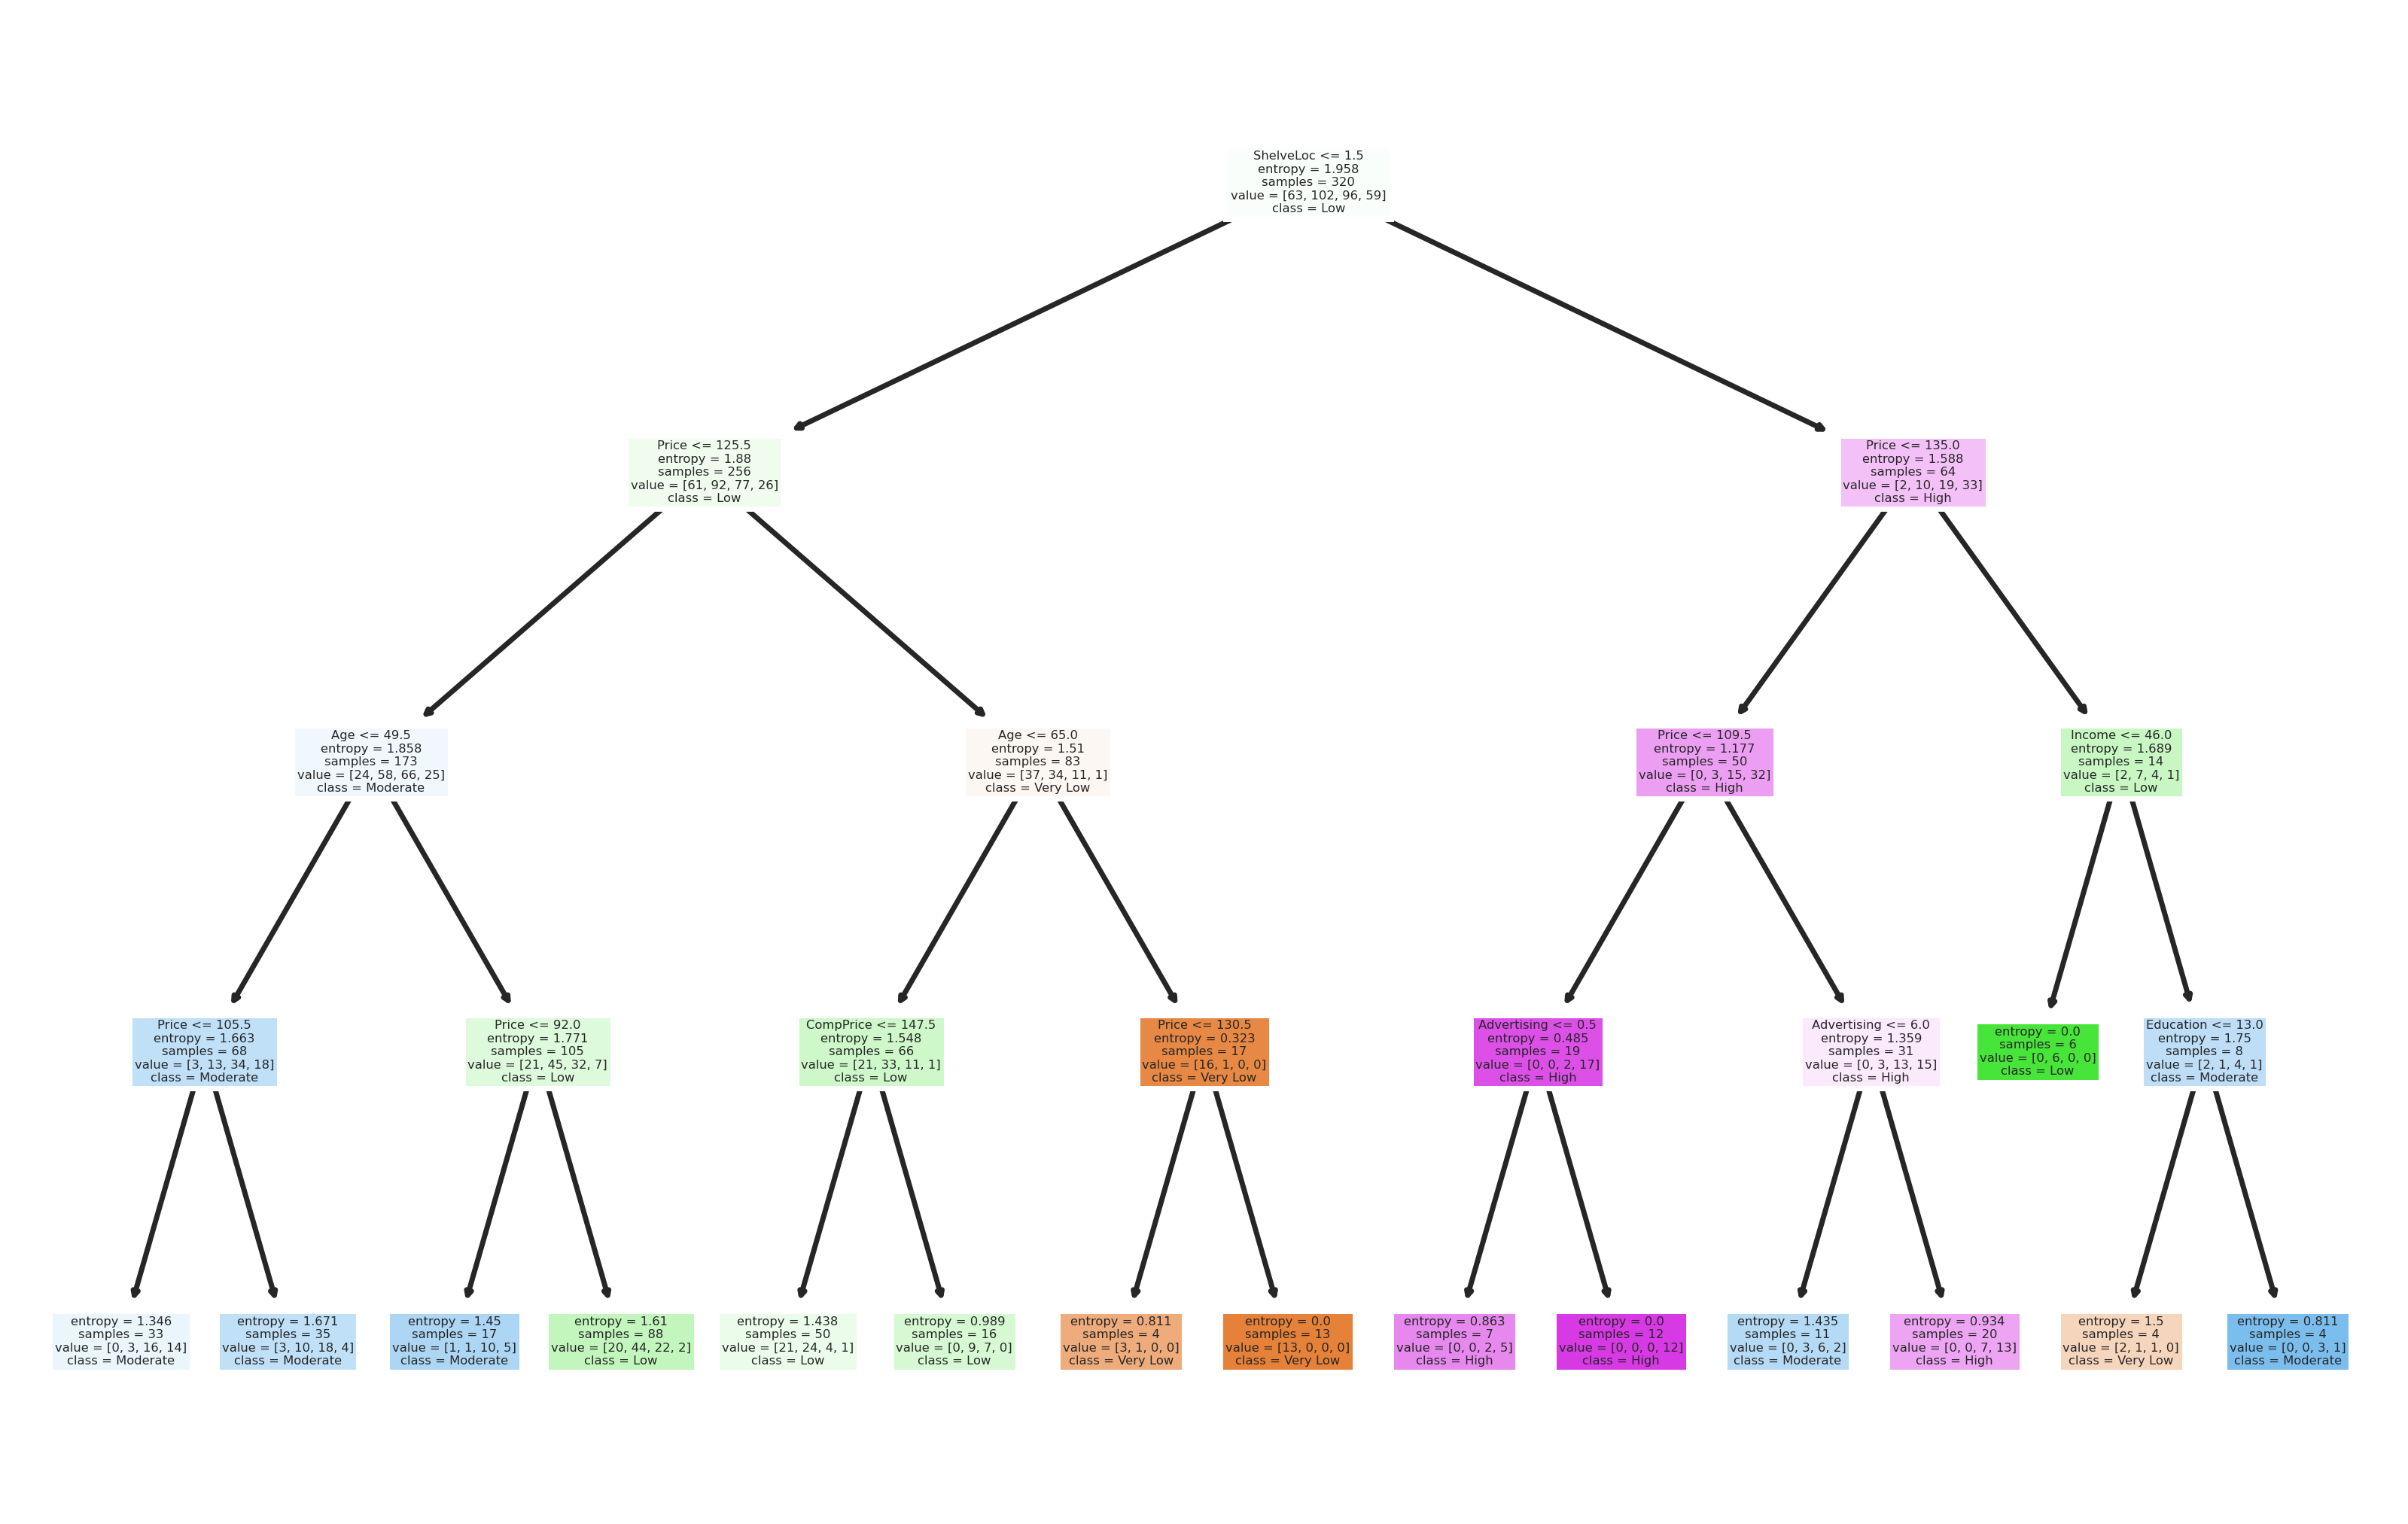

In [41]:
feature_n = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
class_n = ['Very Low' , 'Low' , 'Moderate' , 'High']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=500)
tree.plot_tree(model,feature_names=feature_n,class_names=class_n,filled=True)

In [42]:
mdl_t_df = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
mdl_t_df    #model test df

y_test  y_pred
209      0       2
280      0       1
33       2       3
210      0       2
93       2       1
..     ...     ...
246      1       2
227      2       1
369      3       2
176      1       1
289      2       1

[80 rows x 2 columns]

In [43]:
mdl_t_df['y_test'].value_counts()

2    24
1    23
3    19
0    14
Name: y_test, dtype: int64

In [44]:
mdl_t_df['y_pred'].value_counts()

1    31
2    30
3    14
0     5
Name: y_pred, dtype: int64

In [45]:
pd.crosstab(y_test,y_pred)

col_0   0   1   2   3
Sales_               
0       1  10   3   0
1       2  13   8   0
2       2   8  10   4
3       0   0   9  10

In [46]:
np.mean(y_pred==y_test)

0.425

##### Model Validation

In [47]:
# Define a range of max depth values to search
param_grid = {
    'max_depth': np.arange(1, 10)
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)  # X_train and y_train are your training data

# Print the best max depth value and corresponding cross-validated score
print("Best Max Depth:", grid_search.best_params_['max_depth'])
print("Best Cross-Validated Score:", grid_search.best_score_)


Best Max Depth: 6
Best Cross-Validated Score: 0.43125


In [49]:
model = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [51]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 2, 2, 2, 2, 3, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 2, 1, 3, 0, 2, 2, 3, 1, 0, 1, 2, 3,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 3, 2, 1, 2, 3, 3, 2, 2, 3, 1, 1, 2, 1,
       2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1])

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.07      0.11        14
           1       0.43      0.43      0.43        23
           2       0.39      0.67      0.49        24
           3       0.75      0.47      0.58        19

    accuracy                           0.45        80
   macro avg       0.46      0.41      0.40        80
weighted avg       0.46      0.45      0.43        80



In [53]:
confusion_matrix(y_test,y_pred)

array([[ 1,  8,  5,  0],
       [ 2, 10, 11,  0],
       [ 1,  4, 16,  3],
       [ 0,  1,  9,  9]])

In [54]:
accuracy_score(y_test,y_pred)

0.45

[Text(0.5, 0.875, 'ShelveLoc <= 1.5\ngini = 0.736\nsamples = 320\nvalue = [63, 102, 96, 59]\nclass = Low'),
 Text(0.25, 0.625, 'Price <= 127.0\ngini = 0.713\nsamples = 256\nvalue = [61, 92, 77, 26]\nclass = Low'),
 Text(0.125, 0.375, 'Age <= 73.5\ngini = 0.703\nsamples = 178\nvalue = [26, 59, 68, 25]\nclass = Moderate'),
 Text(0.0625, 0.125, 'gini = 0.697\nsamples = 148\nvalue = [21, 39, 64, 24]\nclass = Moderate'),
 Text(0.1875, 0.125, 'gini = 0.509\nsamples = 30\nvalue = [5, 20, 4, 1]\nclass = Low'),
 Text(0.375, 0.375, 'Age <= 65.0\ngini = 0.606\nsamples = 78\nvalue = [35, 33, 9, 1]\nclass = Very Low'),
 Text(0.3125, 0.125, 'gini = 0.608\nsamples = 62\nvalue = [20, 32, 9, 1]\nclass = Low'),
 Text(0.4375, 0.125, 'gini = 0.117\nsamples = 16\nvalue = [15, 1, 0, 0]\nclass = Very Low'),
 Text(0.75, 0.625, 'Price <= 119.5\ngini = 0.621\nsamples = 64\nvalue = [2, 10, 19, 33]\nclass = High'),
 Text(0.625, 0.375, 'Population <= 293.5\ngini = 0.313\nsamples = 27\nvalue = [0, 1, 4, 22]\nclass 

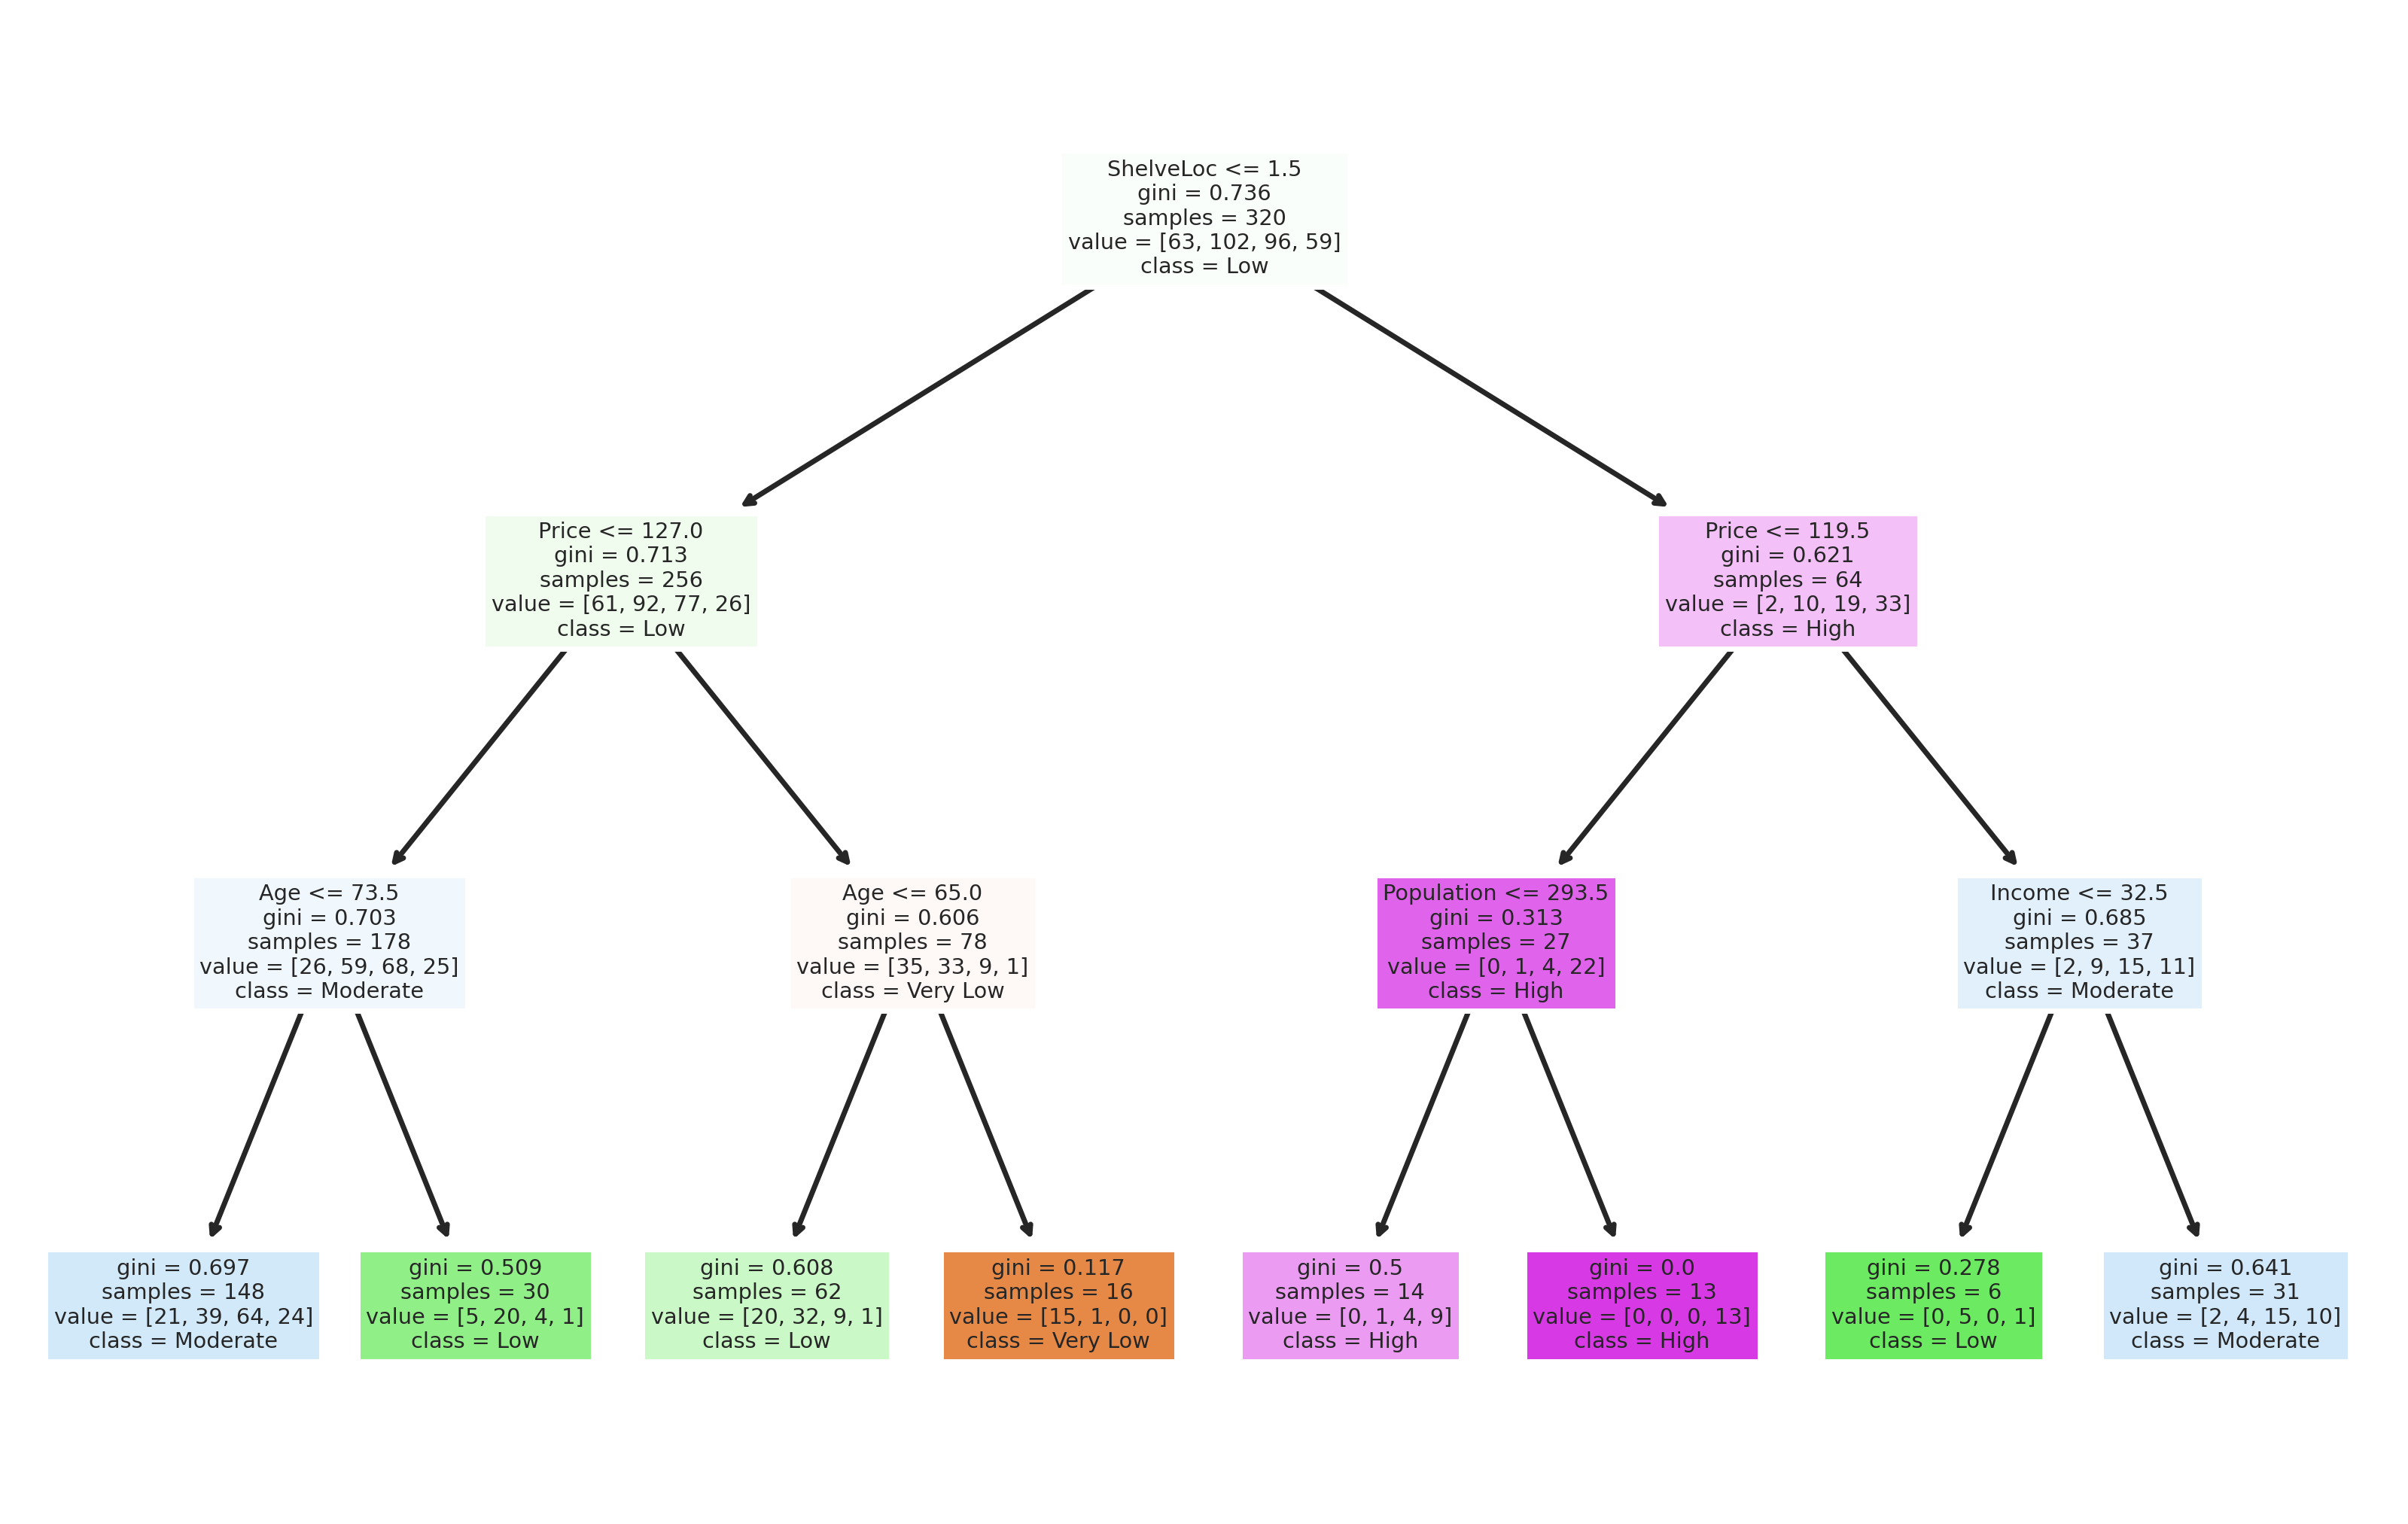

In [55]:
feature_n = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
class_n = ['Very Low' , 'Low' , 'Moderate' , 'High']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=500)
tree.plot_tree(model,feature_names=feature_n,class_names=class_n,filled=True)

##### Model Validation

In [56]:
# Define a range of max depth values to search
param_grid = {
    'max_depth': np.arange(1, 10)
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)  # X_train and y_train are your training data

# Print the best max depth value and corresponding cross-validated score
print("Best Max Depth:", grid_search.best_params_['max_depth'])
print("Best Cross-Validated Score:", grid_search.best_score_)


Best Max Depth: 3
Best Cross-Validated Score: 0.4625


In [57]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [59]:
y_pred = model.predict(X)

In [60]:
np.mean(y_pred==y)

0.4925

[Text(0.5, 0.875, 'ShelveLoc <= 1.5\nentropy = 1.963\nsamples = 400\nvalue = [77, 125, 120, 78]\nclass = Low'),
 Text(0.25, 0.625, 'Price <= 105.5\nentropy = 1.879\nsamples = 315\nvalue = [75, 114, 94, 32]\nclass = Low'),
 Text(0.125, 0.375, 'CompPrice <= 123.5\nentropy = 1.801\nsamples = 108\nvalue = [8, 29, 46, 25]\nclass = Moderate'),
 Text(0.0625, 0.125, 'entropy = 1.805\nsamples = 79\nvalue = [8, 27, 32, 12]\nclass = Moderate'),
 Text(0.1875, 0.125, 'entropy = 1.292\nsamples = 29\nvalue = [0, 2, 14, 13]\nclass = Moderate'),
 Text(0.375, 0.375, 'CompPrice <= 124.5\nentropy = 1.708\nsamples = 207\nvalue = [67, 85, 48, 7]\nclass = Low'),
 Text(0.3125, 0.125, 'entropy = 1.394\nsamples = 74\nvalue = [38, 27, 9, 0]\nclass = Very Low'),
 Text(0.4375, 0.125, 'entropy = 1.744\nsamples = 133\nvalue = [29, 58, 39, 7]\nclass = Low'),
 Text(0.75, 0.625, 'Price <= 135.0\nentropy = 1.511\nsamples = 85\nvalue = [2, 11, 26, 46]\nclass = High'),
 Text(0.625, 0.375, 'Price <= 109.5\nentropy = 1.129\

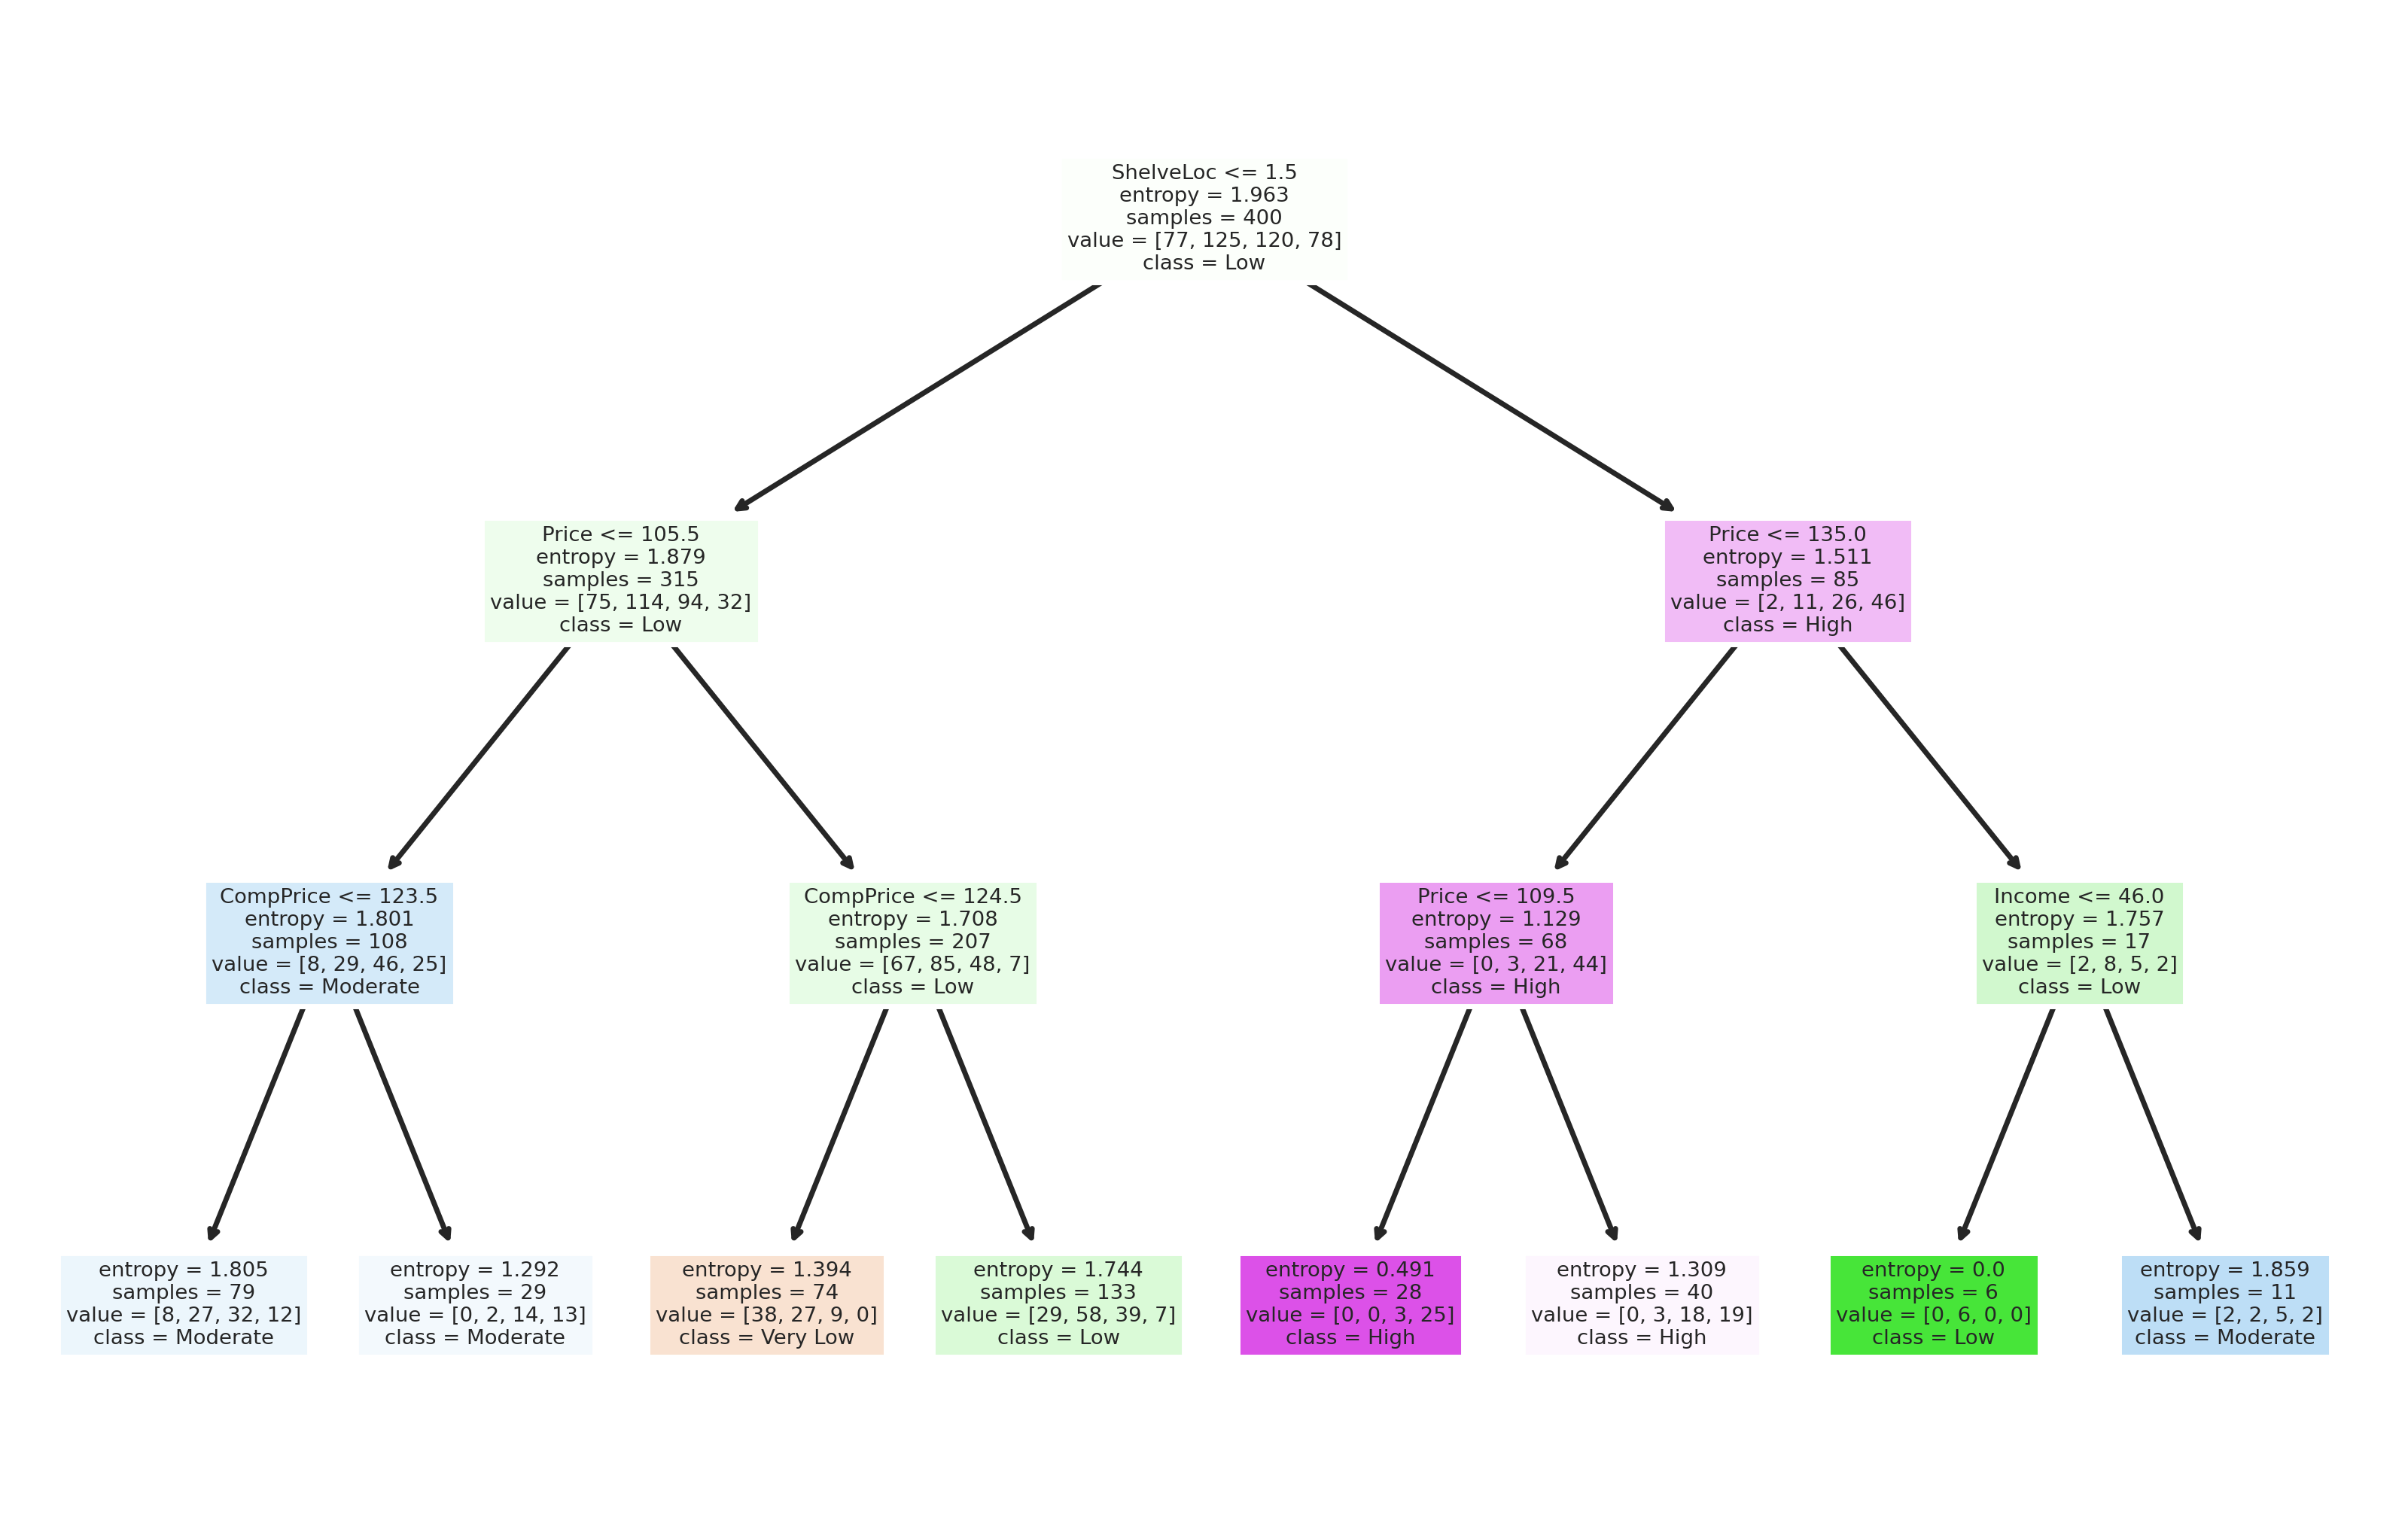

In [61]:
feature_n = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
class_n = ['Very Low' , 'Low' , 'Moderate' , 'High']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=500)
tree.plot_tree(model,feature_names=feature_n,class_names=class_n,filled=True)

In [63]:
df = pd.read_csv('Fraud_check.csv')
df

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [64]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [66]:
df.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [67]:
df.shape

(600, 6)

In [69]:
df.T.duplicated()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

    There is no column duplicated.

    There are no null values

    Undergrad Marital.Status  Taxable.Income  City.Population  \
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
9         YES       Divorced           98152           155482   
12         NO       Divorced           11794           148033   
22        YES       Divorced           78969           155342   
..        ...            ...             ...              ...   
584        NO       Divorced           42679           155684   
587        NO         Single           87685           154677   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
2                 30   YES  
3                 15   YES  
9                  4   YES  
12                14   YES  
22                14    NO  
..               ...   ...  
584             

<Axes: >

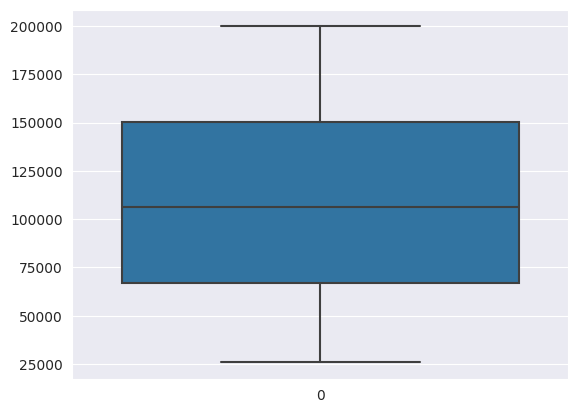

In [72]:
# For City.Population

q1 = df1.iloc[4,0]
q3 = df1.iloc[6,0]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['City.Population']<lower_limit) | (df['City.Population']>upper_limit)])

print(lower_limit)
print(upper_limit)


sns.boxplot(df['City.Population'])

Empty DataFrame
Columns: [Undergrad, Marital.Status, Taxable.Income, City.Population, Work.Experience, Urban]
Index: []
-57754.5
274835.5


<Axes: >

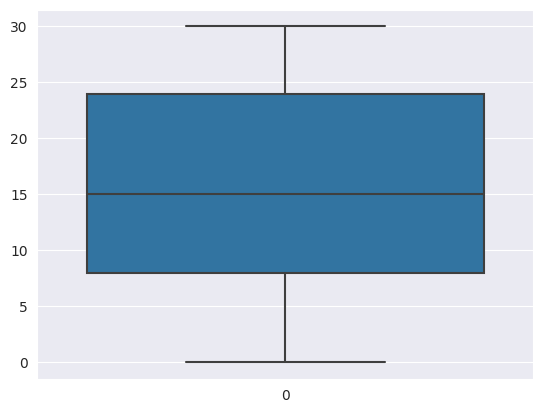

In [73]:
# For Work.Experience

q1 = df1.iloc[4,1]
q3 = df1.iloc[6,1]
iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(df[(df['Work.Experience']<lower_limit) | (df['Work.Experience']>upper_limit)])

print(lower_limit)
print(upper_limit)


sns.boxplot(df['Work.Experience'])

### Correlation Analysis

In [74]:
corr = df.corr()
corr

<ipython-input-74-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Taxable.Income  City.Population  Work.Experience
Taxable.Income         1.000000        -0.064387        -0.001818
City.Population       -0.064387         1.000000         0.013135
Work.Experience       -0.001818         0.013135         1.000000

<ipython-input-75-2c7478f2bb47>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


<Axes: >

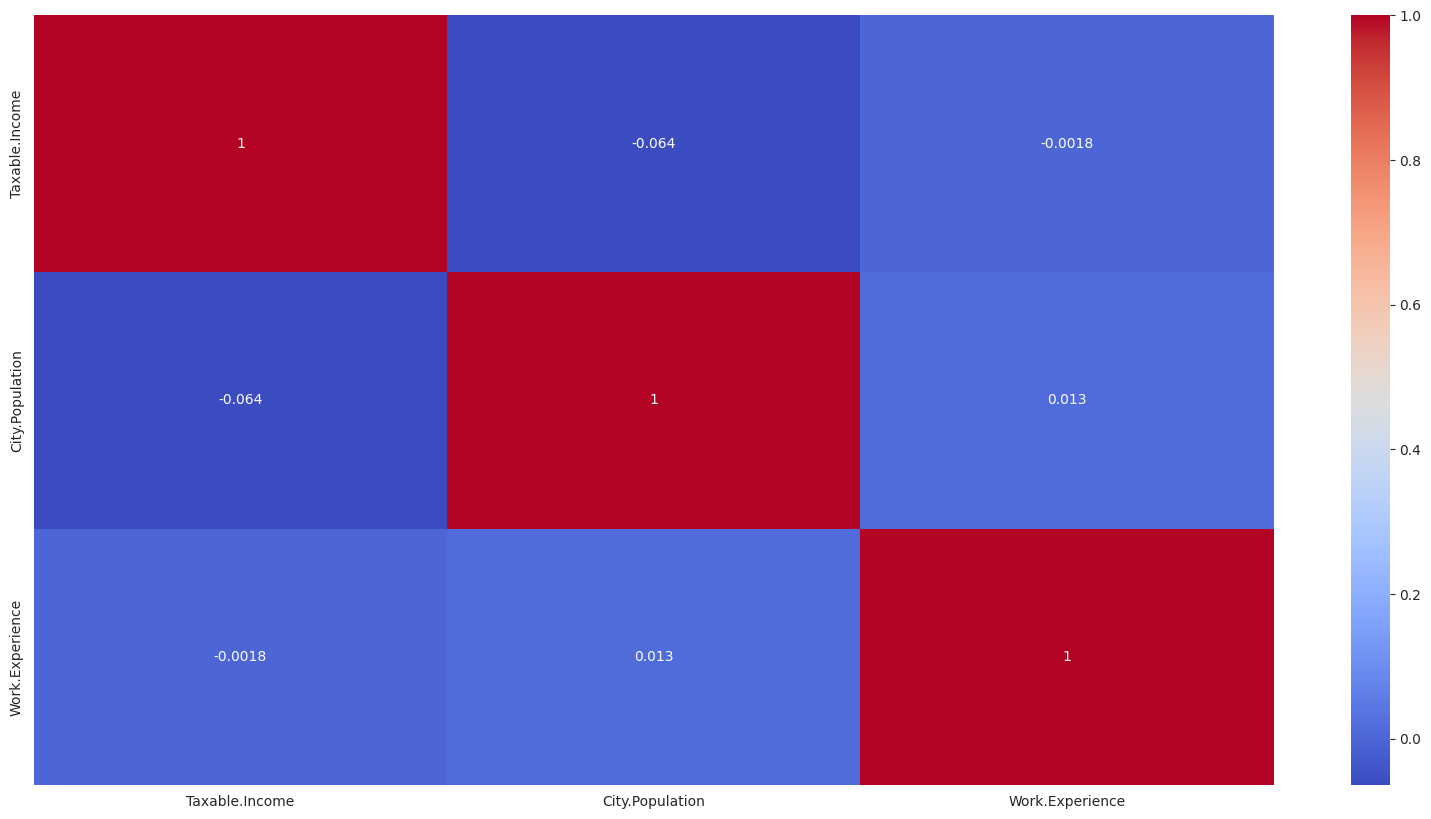

In [75]:
corr_mat = df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')

<Figure size 2000x2000 with 0 Axes>

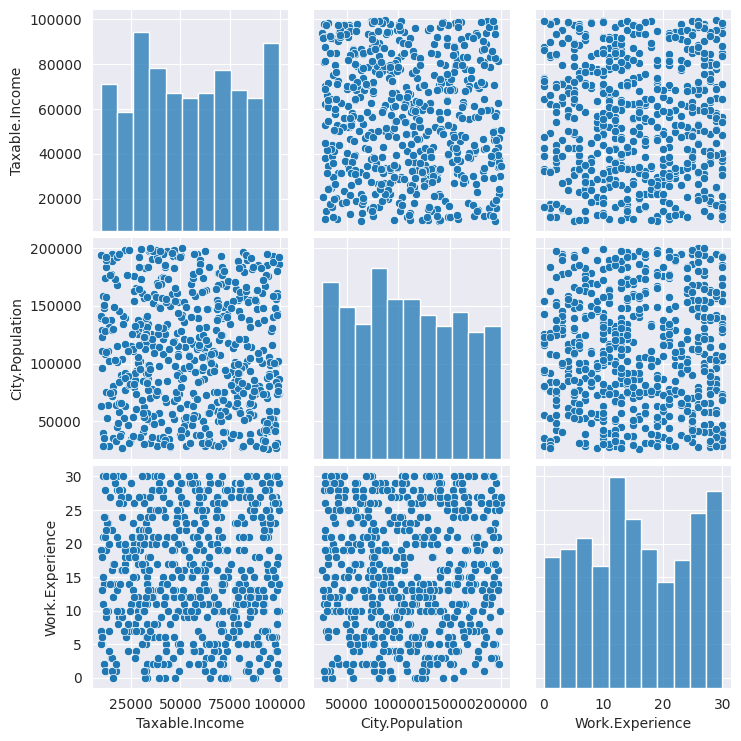

In [76]:
plt.figure(figsize=(20,20))
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [77]:
df1 = df.copy()
df1

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [78]:
txble_incme = df1['Taxable.Income']
df1['Taxable_Income'] = ['Risky' if income <= 30000 else 'Good' for income in txble_incme]
df1

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban Taxable_Income  
0                 10   YES           Good  
1                 18   YES           Good  
2                 30   YES           Good  
3                 15   YES           Good  
4                 28    NO           Good  
..               ...   ...            ...  
595                7   YES           Good  
596                2   YES           Good  
597                0   YES           Good  
598               17    NO           Good  
599               16    NO           Good  

[600 rows x 7 columns]

In [79]:
df1.drop('Taxable.Income',inplace=True,axis=1)
df1

Undergrad Marital.Status  City.Population  Work.Experience Urban  \
0          NO         Single            50047               10   YES   
1         YES       Divorced           134075               18   YES   
2          NO        Married           160205               30   YES   
3         YES         Single           193264               15   YES   
4          NO        Married            27533               28    NO   
..        ...            ...              ...              ...   ...   
595       YES       Divorced            39492                7   YES   
596       YES       Divorced            55369                2   YES   
597        NO       Divorced           154058                0   YES   
598       YES        Married           180083               17    NO   
599        NO       Divorced           158137               16    NO   

    Taxable_Income  
0             Good  
1             Good  
2             Good  
3             Good  
4             Good  
..             ...  
595           Good  
596           Good  
597           Good  
598           Good  
599           Good  

[600 rows x 6 columns]

In [80]:
df1['Taxable_Income'].value_counts()

Good     476
Risky    124
Name: Taxable_Income, dtype: int64

In [81]:
lbl_tax_incm = {'Risky':0,'Good':1}

df1['Taxable_Income'] = df1['Taxable_Income'].map(lbl_tax_incm)
df1

Undergrad Marital.Status  City.Population  Work.Experience Urban  \
0          NO         Single            50047               10   YES   
1         YES       Divorced           134075               18   YES   
2          NO        Married           160205               30   YES   
3         YES         Single           193264               15   YES   
4          NO        Married            27533               28    NO   
..        ...            ...              ...              ...   ...   
595       YES       Divorced            39492                7   YES   
596       YES       Divorced            55369                2   YES   
597        NO       Divorced           154058                0   YES   
598       YES        Married           180083               17    NO   
599        NO       Divorced           158137               16    NO   

     Taxable_Income  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
..              ...  
595               1  
596               1  
597               1  
598               1  
599               1  

[600 rows x 6 columns]

In [82]:
col_to_trnsfrm = ['Undergrad','Marital.Status','Work.Experience','Urban']

lb = LabelEncoder()

for col in col_to_trnsfrm:
  df1[col] = lb.fit_transform(df1[col])
df1

Undergrad  Marital.Status  City.Population  Work.Experience  Urban  \
0            0               2            50047               10      1   
1            1               0           134075               18      1   
2            0               1           160205               30      1   
3            1               2           193264               15      1   
4            0               1            27533               28      0   
..         ...             ...              ...              ...    ...   
595          1               0            39492                7      1   
596          1               0            55369                2      1   
597          0               0           154058                0      1   
598          1               1           180083               17      0   
599          0               0           158137               16      0   

     Taxable_Income  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
..              ...  
595               1  
596               1  
597               1  
598               1  
599               1  

[600 rows x 6 columns]

In [83]:
df1.dtypes

Undergrad          int64
Marital.Status     int64
City.Population    int64
Work.Experience    int64
Urban              int64
Taxable_Income     int64
dtype: object

In [84]:
X = df1.iloc[:,:5]
y = df1.iloc[:,-1]
print(X.shape)
print(y.shape)

(600, 5)
(600,)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(480, 5)
(120, 5)
(480,)
(120,)


In [87]:
df1.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'Taxable_Income'],
      dtype='object')

In [88]:
df1['Taxable_Income'].unique()

array([1, 0])

[Text(0.4230769230769231, 0.875, 'City.Population <= 60294.5\nentropy = 0.73\nsamples = 480\nvalue = [98, 382]\nclass = Good'),
 Text(0.15384615384615385, 0.625, 'Work.Experience <= 6.5\nentropy = 0.602\nsamples = 102\nvalue = [15, 87]\nclass = Good'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]\nclass = Good'),
 Text(0.23076923076923078, 0.375, 'Undergrad <= 0.5\nentropy = 0.672\nsamples = 85\nvalue = [15, 70]\nclass = Good'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.426\nsamples = 46\nvalue = [4, 42]\nclass = Good'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.858\nsamples = 39\nvalue = [11, 28]\nclass = Good'),
 Text(0.6923076923076923, 0.625, 'City.Population <= 64532.5\nentropy = 0.759\nsamples = 378\nvalue = [83, 295]\nclass = Good'),
 Text(0.5384615384615384, 0.375, 'Work.Experience <= 23.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]\nclass = Risky'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.863\nsamples = 7\nvalue = [5, 2]\ncl

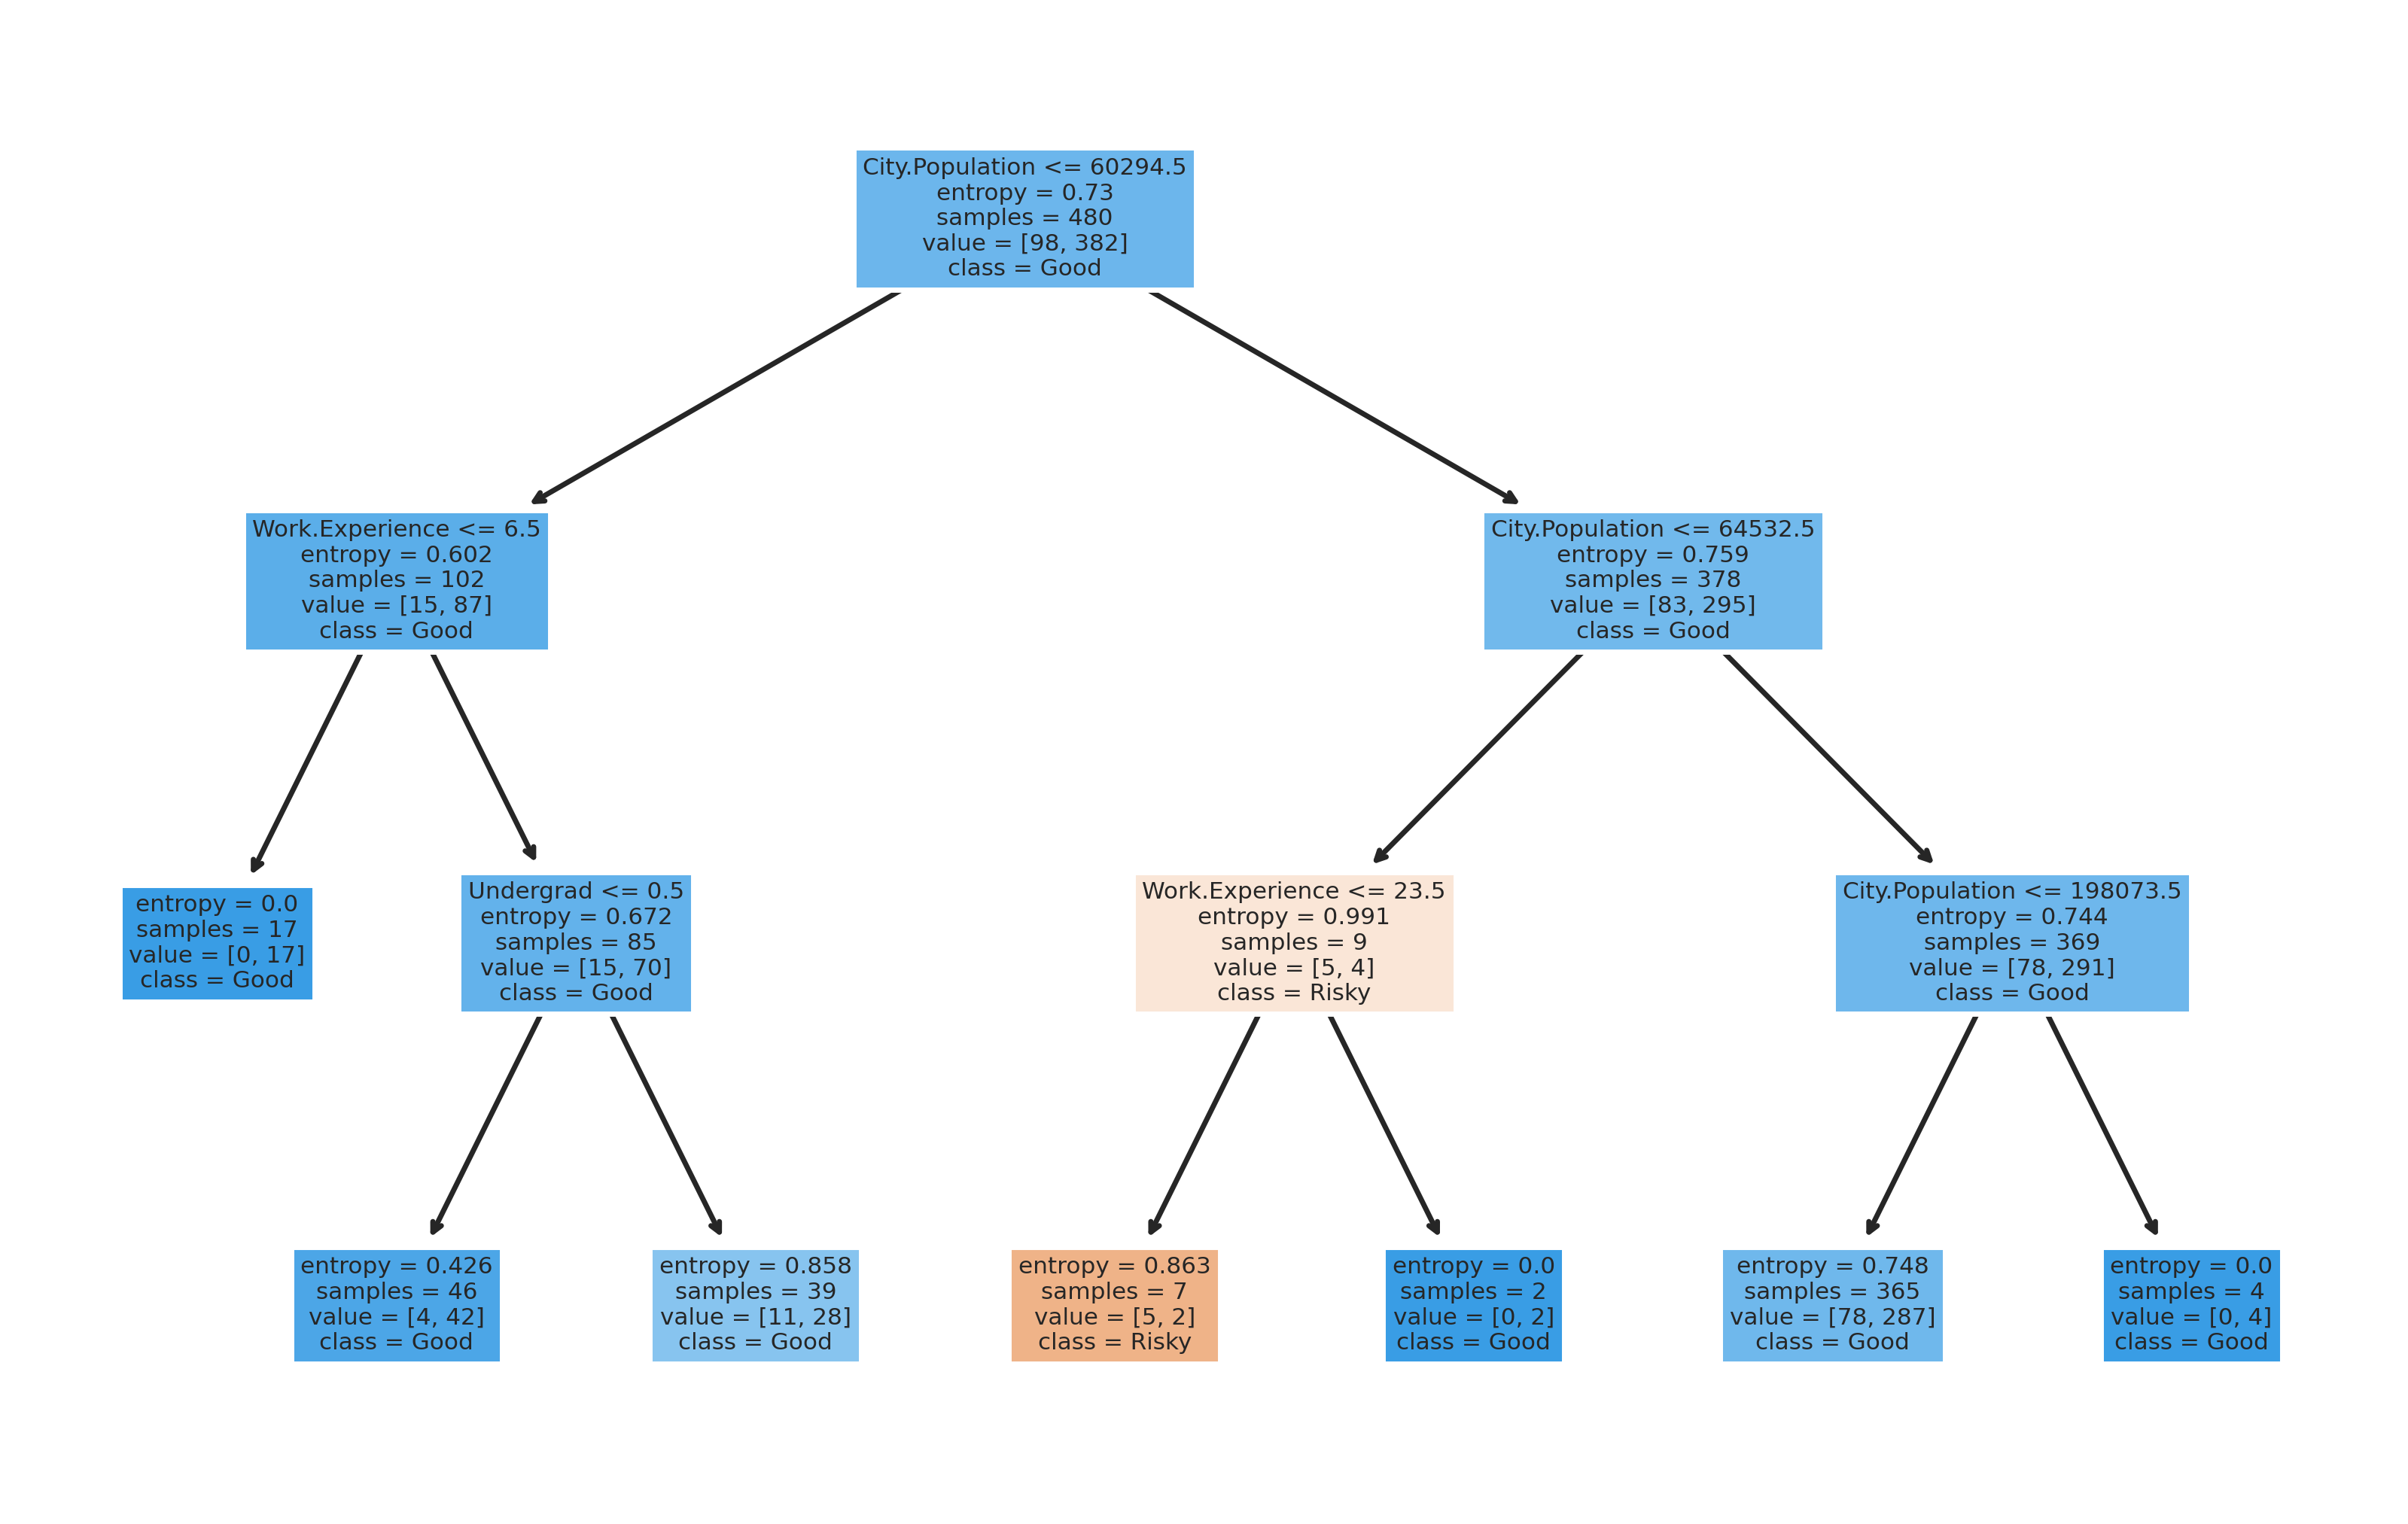

In [90]:
feature_n = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']
class_n = ['Risky','Good']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=500)
tree.plot_tree(model,feature_names=feature_n,class_names=class_n,filled=True)

In [91]:
y_pred = model.predict(X_test)

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      0.98      0.87        94

    accuracy                           0.77       120
   macro avg       0.39      0.49      0.43       120
weighted avg       0.61      0.77      0.68       120



In [93]:
confusion_matrix(y_test,y_pred)

array([[ 0, 26],
       [ 2, 92]])

In [94]:
accuracy_score(y_test,y_pred)

0.7666666666666667

In [95]:
mdl_t_df = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
mdl_t_df

y_test  y_pred
110       0       1
419       1       1
565       1       1
77        1       1
181       0       1
..      ...     ...
399       1       1
340       1       1
148       1       1
494       1       1
439       0       1

[120 rows x 2 columns]

In [97]:
mdl_t_df['y_test'].value_counts()

1    94
0    26
Name: y_test, dtype: int64

In [98]:
mdl_t_df['y_test'].value_counts()


1    94
0    26
Name: y_test, dtype: int64

In [99]:
pd.crosstab(y_test,y_pred)

col_0           0   1
Taxable_Income       
0               0  26
1               2  92

In [100]:
# Define a range of max depth values to search
param_grid = {
    'max_depth': np.arange(1, 10)
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)  # X_train and y_train are your training data

# Print the best max depth value and corresponding cross-validated score
print("Best Max Depth:", grid_search.best_params_['max_depth'])
print("Best Cross-Validated Score:", grid_search.best_score_)


Best Max Depth: 1
Best Cross-Validated Score: 0.79375


In [102]:
y_pred = model.predict(X_test)

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      0.97      0.86        94

    accuracy                           0.76       120
   macro avg       0.39      0.48      0.43       120
weighted avg       0.61      0.76      0.68       120



In [104]:
confusion_matrix(y_test,y_pred)

array([[ 0, 26],
       [ 3, 91]])

In [105]:
accuracy_score(y_test,y_pred)

0.7583333333333333

In [106]:
mdl_t_df = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
mdl_t_df

y_test  y_pred
110       0       1
419       1       1
565       1       1
77        1       1
181       0       1
..      ...     ...
399       1       1
340       1       1
148       1       1
494       1       1
439       0       1

[120 rows x 2 columns]

In [107]:
mdl_t_df['y_test'].value_counts()

1    94
0    26
Name: y_test, dtype: int64

In [108]:
mdl_t_df['y_pred'].value_counts()

1    117
0      3
Name: y_pred, dtype: int64

In [109]:
pd.crosstab(y_test,y_pred)

col_0           0   1
Taxable_Income       
0               0  26
1               3  91

[Text(0.5, 0.875, 'City.Population <= 60294.5\ngini = 0.325\nsamples = 480\nvalue = [98, 382]\nclass = Good'),
 Text(0.25, 0.625, 'Undergrad <= 0.5\ngini = 0.251\nsamples = 102\nvalue = [15, 87]\nclass = Good'),
 Text(0.125, 0.375, 'Marital.Status <= 1.5\ngini = 0.137\nsamples = 54\nvalue = [4, 50]\nclass = Good'),
 Text(0.0625, 0.125, 'gini = 0.198\nsamples = 36\nvalue = [4, 32]\nclass = Good'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]\nclass = Good'),
 Text(0.375, 0.375, 'City.Population <= 28457.0\ngini = 0.353\nsamples = 48\nvalue = [11, 37]\nclass = Good'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Risky'),
 Text(0.4375, 0.125, 'gini = 0.315\nsamples = 46\nvalue = [9, 37]\nclass = Good'),
 Text(0.75, 0.625, 'City.Population <= 64532.5\ngini = 0.343\nsamples = 378\nvalue = [83, 295]\nclass = Good'),
 Text(0.625, 0.375, 'Work.Experience <= 23.5\ngini = 0.494\nsamples = 9\nvalue = [5, 4]\nclass = Risky'),
 Text(0.5625, 0.125, 'gini 

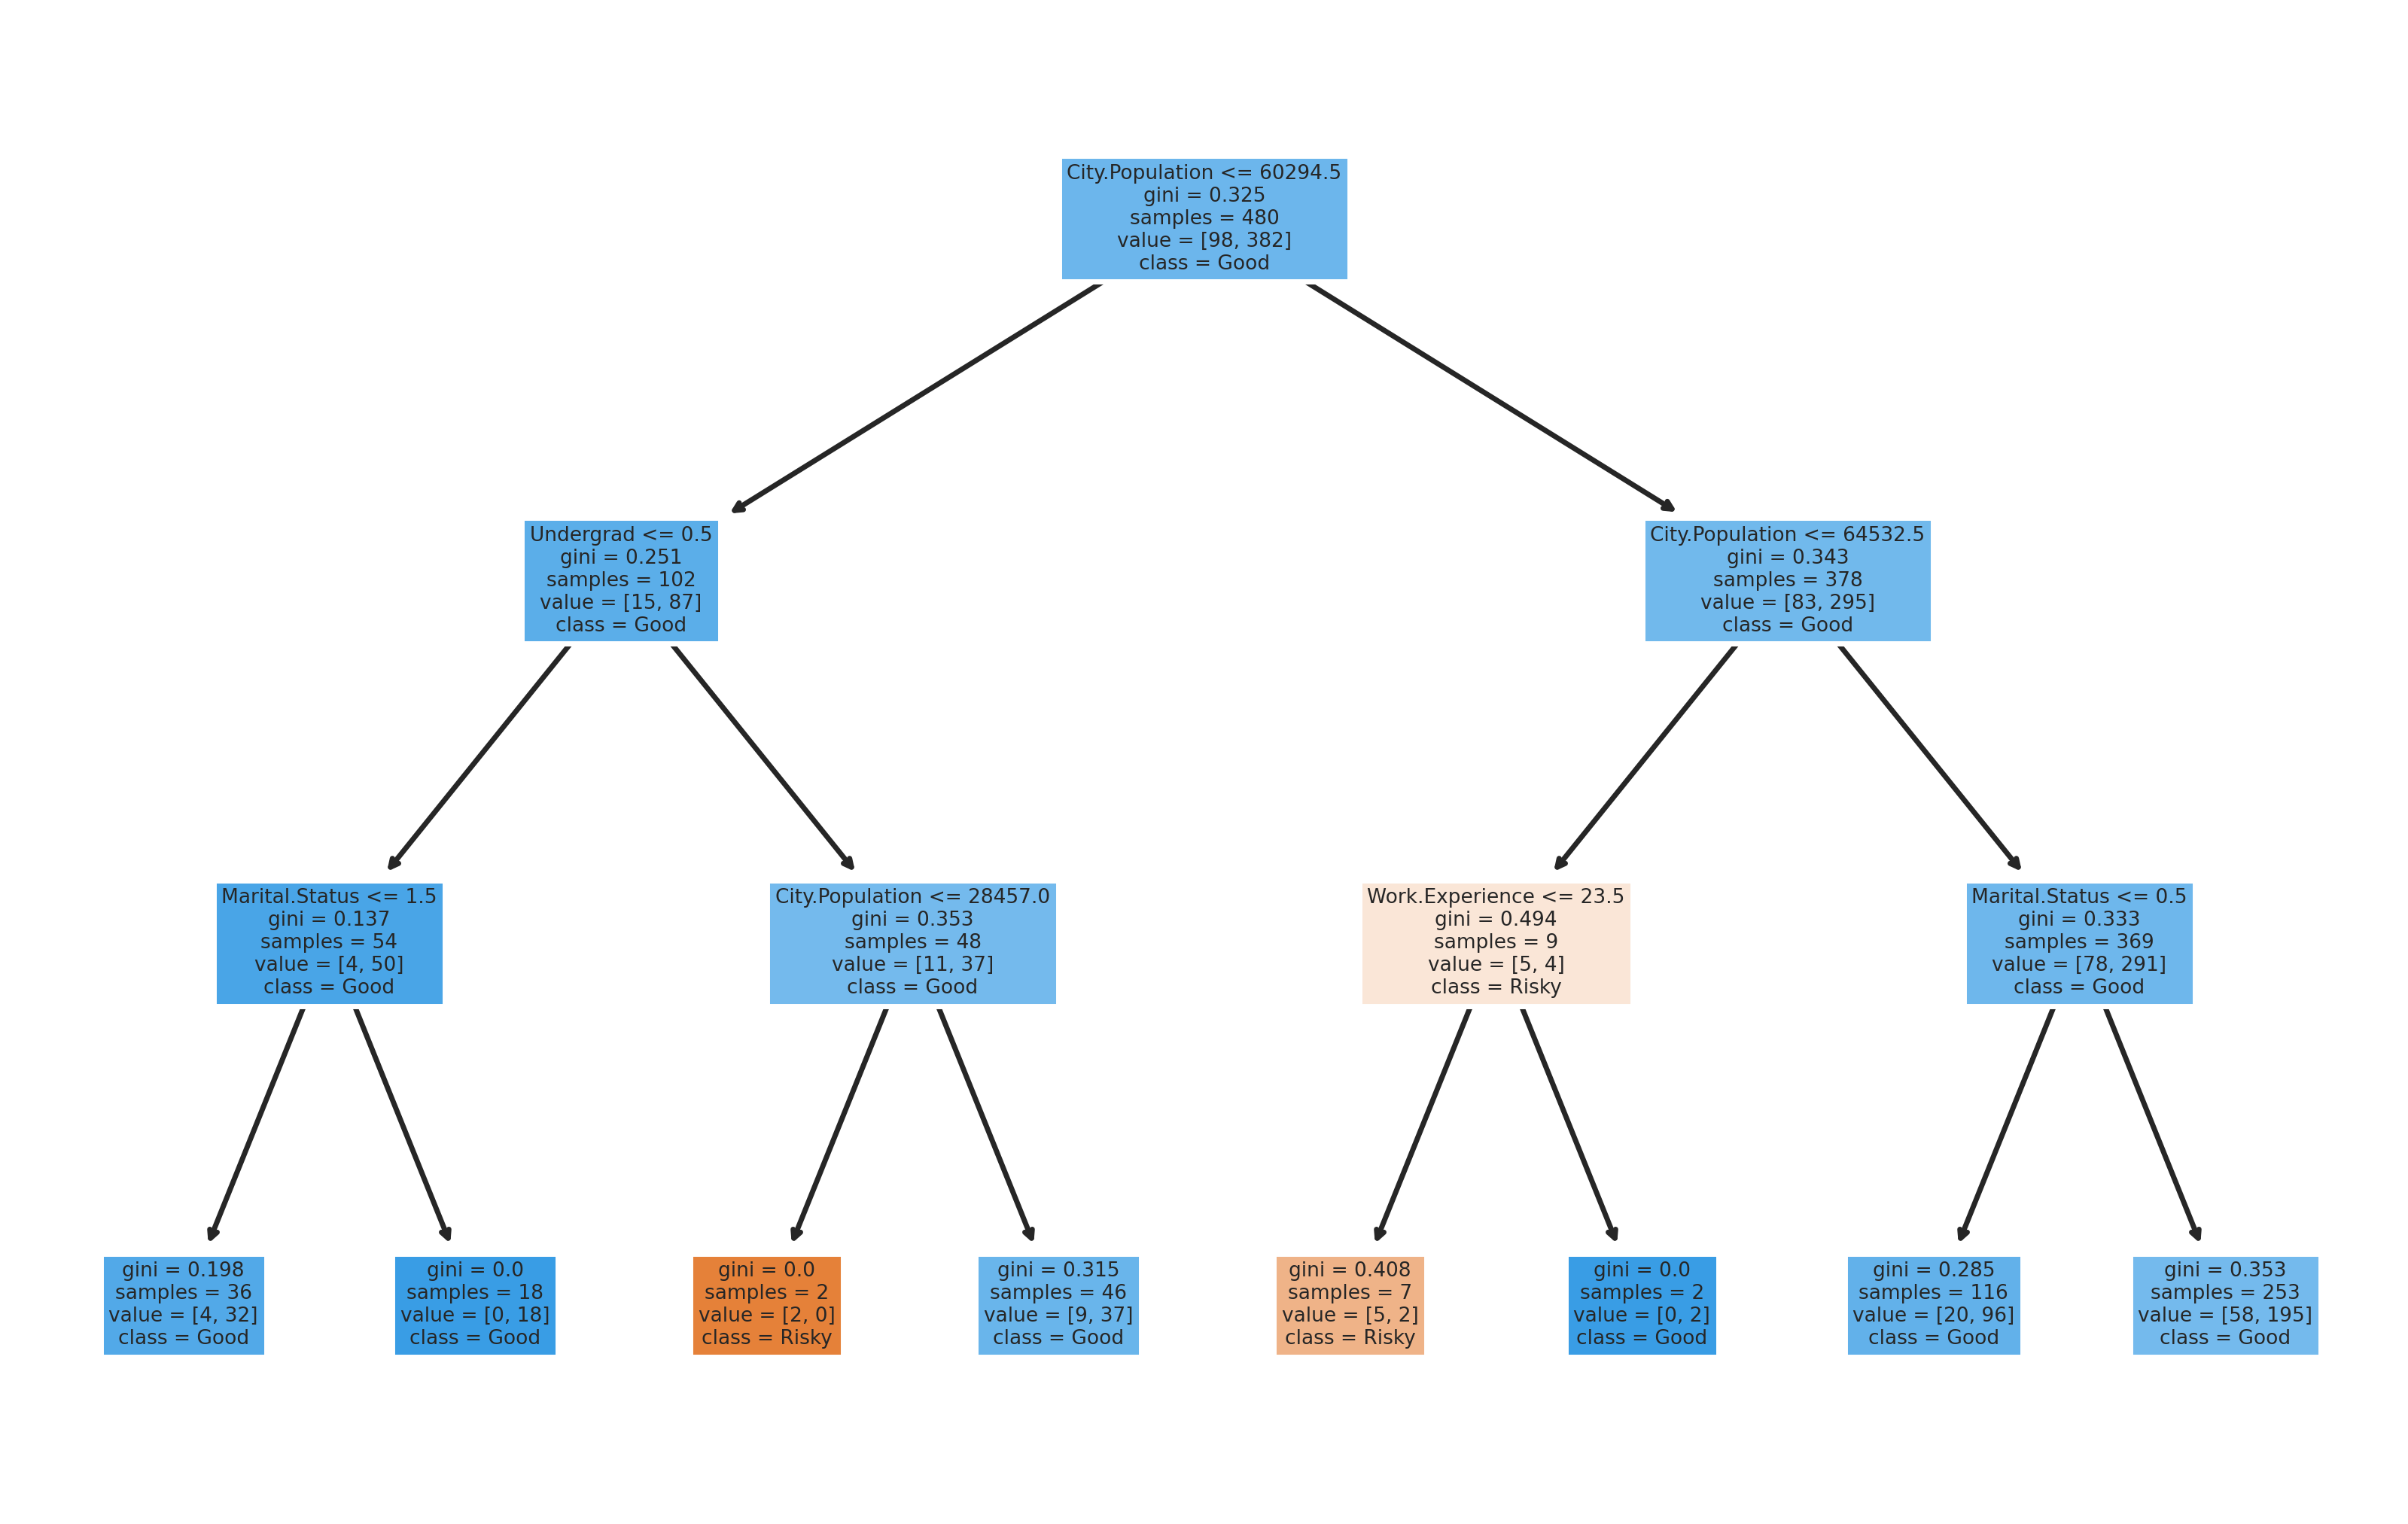

In [110]:
feature_n = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']
class_n = ['Risky','Good']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=500)
tree.plot_tree(model,feature_names=feature_n,class_names=class_n,filled=True)

#### Model Validation

In [111]:
# Define a range of max depth values to search
param_grid = {
    'max_depth': np.arange(1, 10)
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)  # X_train and y_train are your training data

# Print the best max depth value and corresponding cross-validated score
print("Best Max Depth:", grid_search.best_params_['max_depth'])
print("Best Cross-Validated Score:", grid_search.best_score_)


Best Max Depth: 1
Best Cross-Validated Score: 0.79375


In [113]:
y_pred = model.predict(X)

In [114]:
np.mean(y_pred==y)

0.7966666666666666

[Text(0.5416666666666666, 0.875, 'Work.Experience <= 24.5\ngini = 0.328\nsamples = 600\nvalue = [124, 476]\nclass = Good'),
 Text(0.3333333333333333, 0.625, 'City.Population <= 197770.0\ngini = 0.344\nsamples = 466\nvalue = [103, 363]\nclass = Good'),
 Text(0.16666666666666666, 0.375, 'Work.Experience <= 17.5\ngini = 0.34\nsamples = 461\nvalue = [100, 361]\nclass = Good'),
 Text(0.08333333333333333, 0.125, 'gini = 0.312\nsamples = 346\nvalue = [67, 279]\nclass = Good'),
 Text(0.25, 0.125, 'gini = 0.409\nsamples = 115\nvalue = [33, 82]\nclass = Good'),
 Text(0.5, 0.375, 'Undergrad <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = Risky'),
 Text(0.4166666666666667, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Risky'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Good'),
 Text(0.75, 0.625, 'Work.Experience <= 25.5\ngini = 0.264\nsamples = 134\nvalue = [21, 113]\nclass = Good'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsample

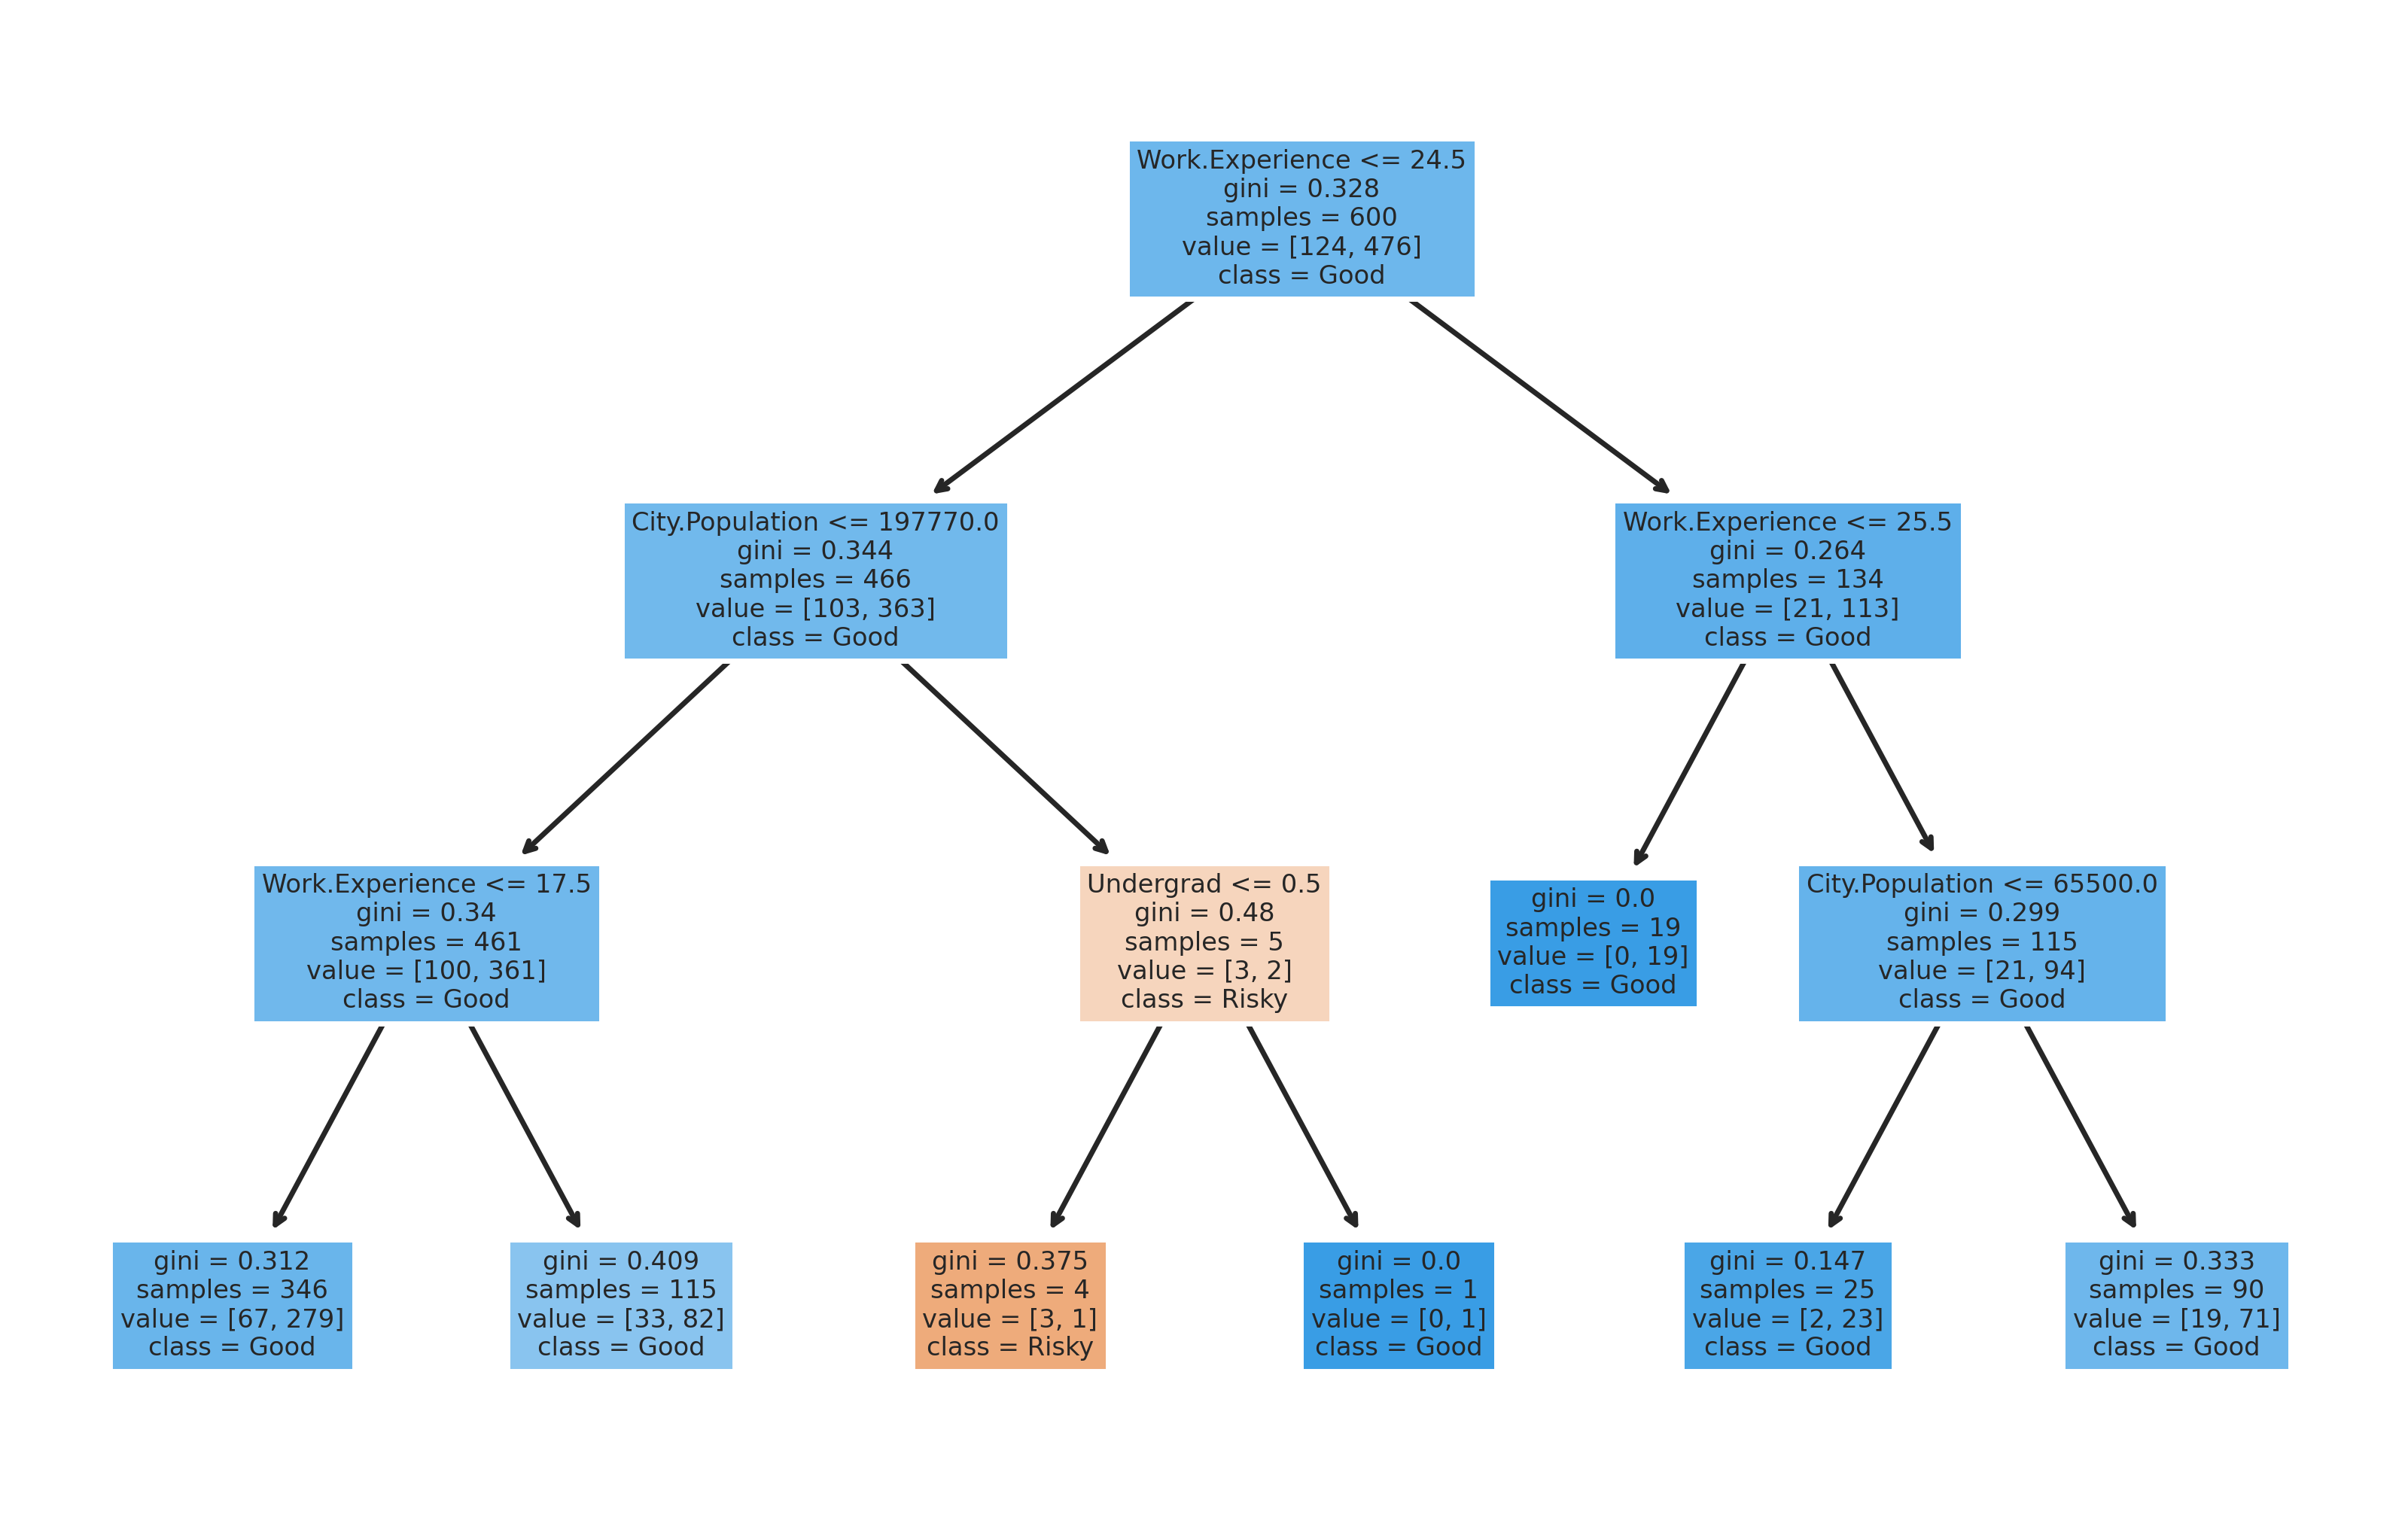

In [115]:
feature_n = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']
class_n = ['Risky','Good']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=500)
tree.plot_tree(model,feature_names=feature_n,class_names=class_n,filled=True)